## Lending Club Case Study

This project explores how to identify risky loan applicants using Exploratory Data Analysis (EDA). We have analyzed past loan data to understand factors that influence whether a person will default on a loan.

#### Import Required Libraries

In [117]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

#### Data Extracting - Load CSV file into data frame

In [119]:
loandf=pd.read_csv('loan.csv',low_memory=False);

In [120]:
## Increasing the row size as many of the results are getting hidden ##
## due to large number of rows return as part of compytation. ##

pd.options.display.max_rows = 25000

#### Analyze dataframe head post loading the CSV File

In [122]:
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [123]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Data Cleaning

##### Check percentage of null values in each coloums in loan datafarme

In [126]:
loandf.isnull().sum()/len(loandf)*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

##### We can see that there are coloums which are not having any values (100% null values) and high percent of null values:
#####  1. 60%+ [mths_since_last_delinq]
#####  2. 90%+ [mths_since_last_record, next_pymnt_d]
##### We need to drop these coloums from dataframe

In [128]:

## getting all coloms have 100% null values and droping them 
loandf.dropna(axis=1,how='all',inplace=True)

## droping other coloums with high percentage of null values.
drop_list= ['mths_since_last_delinq','mths_since_last_record', 'next_pymnt_d']
thisFilter = loandf.filter(drop_list)
loandf.drop(thisFilter, inplace=True, axis=1)
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [129]:
## Droping single value colums
for column in loandf.columns:
    if loandf[column].value_counts().shape[0]==1:
            print("*****"+column+"*******")
            loandf.drop([column],axis=1,inplace=True)

*****pymnt_plan*******
*****initial_list_status*******
*****collections_12_mths_ex_med*******
*****policy_code*******
*****application_type*******
*****acc_now_delinq*******
*****chargeoff_within_12_mths*******
*****delinq_amnt*******
*****tax_liens*******


#### Data Manipulation

In [131]:
## Since we can see that there are more that 25000 distinct employee title so we cannot categorize them into relvent bins
## and thus title wise loan defaulter will not be help full rather we can use employee length for same 
## id, member_id, url,desc,title are not useful for defaulter analysis 
## we can give analysis at state level rather than zip_code level that, that can be more helpful

drop_list= ['id','member_id','url','desc','emp_title','title','zip_code']
thisFilter = loandf.filter(drop_list)
loandf.drop(thisFilter, inplace=True, axis=1)
loandf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [132]:
## DIT ratio itself combines information about customer debt and  income so we can use that and combine it with other 
## factors for analysis. Other loan and income related attributes we can drop off. Also some info are  available 
## after loan is approved. We can drop those info as their analysis will not help to make any decision at time of loan Approval 

In [133]:
info_which_are_not_available_at_loan_approval_time=['installment',
                                                    'delinq_2yrs',
                                                    'inq_last_6mths',
                                                    'open_acc',
                                                    'total_acc',
                                                    'out_prncp',
                                                    'out_prncp_inv',
                                                    'total_pymnt',
                                                    'total_pymnt_inv',
                                                    'total_rec_prncp',
                                                    'total_rec_int',
                                                    'total_rec_late_fee',
                                                    'recoveries',
                                                    'collection_recovery_fee',
                                                    'last_pymnt_d',
                                                    'last_pymnt_amnt',
                                                    'last_credit_pull_d',                                                    
                                                   ]
thisFilter = loandf.filter(info_which_are_not_available_at_loan_approval_time)
loandf.drop(thisFilter, inplace=True, axis=1)
loandf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [134]:
loandf.isnull().sum()/len(loandf)*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
pub_rec_bankruptcies    1.754916
dtype: float64

#### Fix missing emp_length

In [136]:
# Current Emp Length value counts
loandf.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

#### Using mode value to fix missing values for emp_length

In [138]:
loandf['emp_length'] = loandf['emp_length'].fillna(loandf['emp_length'].mode()[0])

In [139]:
# After fixing missing values with mode for emp_length
loandf.emp_length.value_counts()

emp_length
10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

#### Convert intrest rate to float

In [141]:
loandf["int_rate"]=loandf["int_rate"].apply(lambda x : float(x[0:-1] if x[-1]=='%' else x ))

In [142]:
loandf["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [143]:
loandf.isnull().sum()/len(loandf)*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
pub_rec_bankruptcies    1.754916
dtype: float64

#### Fix revol_util for missing values

In [145]:
# Current value count of revol_util for missing values
loandf[loandf['revol_util'].isna()]['loan_status'].value_counts()

loan_status
Fully Paid     34
Charged Off    16
Name: count, dtype: int64

In [146]:
loandf.shape

(39717, 21)

#### We can drop these rows as  missing values data is less

In [148]:
loandf.drop(loandf[loandf['revol_util'].isna()].index, inplace=True)

In [149]:
#After dropping missing rows for revol_util as the data was very less 
loandf.shape

(39667, 21)

### Fixing pub_rec_bankruptcies for missing values

In [151]:
len(loandf[(loandf['pub_rec_bankruptcies'].isna()) & (loandf['loan_status'] == "Charged Off")])

118

In [152]:
len(loandf[(loandf['pub_rec_bankruptcies'].isna()) & (loandf['loan_status'] != "Charged Off")])

579

In [153]:
loandf[(~loandf['pub_rec_bankruptcies'].isna()) & (loandf['loan_status'] == "Charged Off")]['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    5125
1.0     366
2.0       2
Name: count, dtype: int64

In [154]:
#loandf.drop(['pub_rec_bankruptcies'],axis=1,inplace=True)
loandf[(~loandf.pub_rec_bankruptcies.isna()) & (loandf.loan_status!="Charged Off")][['pub_rec_bankruptcies']].value_counts()

pub_rec_bankruptcies
0.0                     32165
1.0                      1307
2.0                         5
Name: count, dtype: int64

In [155]:
loandf['pub_rec_bankruptcies'] = loandf['pub_rec_bankruptcies'].fillna(loandf['pub_rec_bankruptcies'].mode()[0])

In [156]:
loandf.pub_rec_bankruptcies.isna().sum()

0

In [157]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39667 non-null  int64  
 1   funded_amnt           39667 non-null  int64  
 2   funded_amnt_inv       39667 non-null  float64
 3   term                  39667 non-null  object 
 4   int_rate              39667 non-null  float64
 5   grade                 39667 non-null  object 
 6   sub_grade             39667 non-null  object 
 7   emp_length            39667 non-null  object 
 8   home_ownership        39667 non-null  object 
 9   annual_inc            39667 non-null  float64
 10  verification_status   39667 non-null  object 
 11  issue_d               39667 non-null  object 
 12  loan_status           39667 non-null  object 
 13  purpose               39667 non-null  object 
 14  addr_state            39667 non-null  object 
 15  dti                   39

In [158]:
## Extracting month and year
loandf["issue_month"]=loandf['issue_d'].apply(lambda dt: dt.split("-")[0])     
loandf["issue_year"]=loandf['issue_d'].apply(lambda dt: dt.split("-")[1])  

In [159]:
loandf.dti.describe()

count    39667.000000
mean        13.318704
std          6.676975
min          0.000000
25%          8.180000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

#### Categorize dti data into [0-5], [5-10], [10-15], [15-20], [20-25], [25-30]

In [161]:
#[0-5)[5-10)[10,15)[15,20)[20,25)[25,30)
def dticut(dti):
    if dti>=0 and dti<5 :
        return "0-5%"
    elif dti>=5 and dti<10 :
        return "5-10%"
    elif dti>=10 and dti<15:
        return "10-15%"
    elif dti>=15 and dti<20:
        return "15-20%"
    elif dti>=20 and dti<25:
        return "20-25%"
    elif dti>=25 and dti<30:
        return "25-30%"
    else:
        return "30+%"
loandf['dti_group']=loandf.dti.apply(lambda x: dticut(x))

#### Categorize interest rate into [0-5], [5-10], [10-15], [15-20], [20-25]

In [163]:
#[0-5], [5-10], [10-15], [15-20], [20-25]
def intrest_rate_cut(int_rate):
    if int_rate>=0 and int_rate<5 :
        return "0-5%"
    elif int_rate>=5 and int_rate<10 :
        return "5-10%"
    elif int_rate>=10 and int_rate<15:
        return "10-15%"
    elif int_rate>=15 and int_rate<20:
        return "15-20%"
    else:
        return "20-25%"   
loandf['intrest_rate_group']=loandf.int_rate.apply(lambda x: intrest_rate_cut(x))

In [164]:
loandf.revol_util.describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

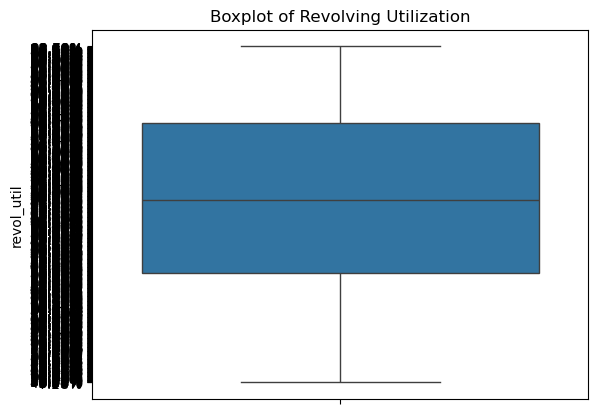

In [165]:
# Create the boxplot
sns.boxplot(y=loandf['revol_util'])

# Show the plot
plt.title('Boxplot of Revolving Utilization')
plt.show()

#### convert revol_util into float and then categotrize revol_util
#### into [0-10],[10-20],[20-30],[30-40],[40-50],[50-60],[60-70],[70-80],[80-90],[90-100]

In [167]:
def convert_revol_util(x):
    if isinstance(x, str) and x.endswith('%'):
        return float(x[:-1]) / 100  # Convert percentage string to float
    elif isinstance(x, (int, float)):  # Handle already float or int
        return float(x)
    else:  # Handle NaN or other types
        return x

loandf['revol_util'] = loandf['revol_util'].apply(convert_revol_util)

In [168]:
def categorize_revolving_utilization(revolving_util):
    """Categorize revolving utilization into percentage ranges."""
    if 0 <= revolving_util < 10:
        return "0-10%"
    elif 10 <= revolving_util < 20:
        return "10-20%"
    elif 20 <= revolving_util < 30:
        return "20-30%"
    elif 30 <= revolving_util < 40:
        return "30-40%"
    elif 40 <= revolving_util < 50:
        return "40-50%"
    elif 50 <= revolving_util < 60:
        return "50-60%"
    elif 60 <= revolving_util < 70:
        return "60-70%"
    elif 70 <= revolving_util < 80:
        return "70-80%"
    elif 80 <= revolving_util < 90:
        return "80-90%"
    elif 90 <= revolving_util <= 100:
        return "90-100%"
    else:
        return "Out of range"  # Handle values outside the expected range

# Apply the categorization function to the 'revol_util' column
loandf['revol_util_group'] = loandf['revol_util'].apply(categorize_revolving_utilization)


#### Univariate Analysis

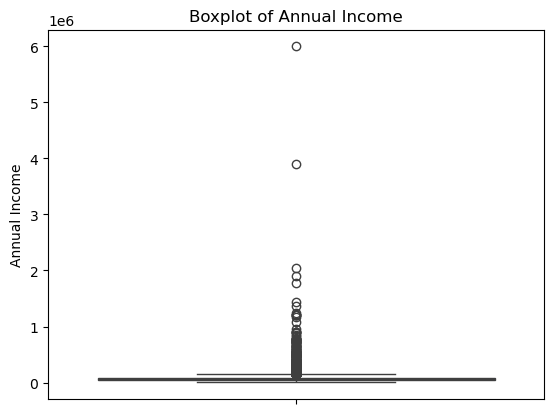

In [170]:
sns.boxplot(y=loandf['annual_inc'])

# Set plot title and labels
plt.title('Boxplot of Annual Income')
plt.ylabel('Annual Income')
plt.show()

In [171]:
loandf['annual_inc'].describe()

count    3.966700e+04
mean     6.899952e+04
std      6.378947e+04
min      4.000000e+03
25%      4.051632e+04
50%      5.900000e+04
75%      8.240000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [172]:
percentiles = np.percentile(loandf['annual_inc'].dropna(), [25, 50, 75])

In [173]:
# Calculate the 25th and 75th percentiles (Q1 and Q3)
quartiles=np.percentile(loandf.annual_inc,[25,75])

# Calculate IQR
iqr=quartiles[1]-quartiles[0]

# Calculate the upper bound for outliers
upper_bound = quartiles[1]+( iqr*1.5)

# Filter for outliers and retrieve relevant columns, sorted by annual income
loandf[(loandf.annual_inc>upper_bound)][['annual_inc','loan_status']].sort_values(by="annual_inc",ascending=False)

# Check the shape of the outliers DataFrame
loandf[(loandf.annual_inc>upper_bound)].shape


(1842, 26)

In [174]:
# Drop outliers based on the upper bound for annual income
loandf.drop(loandf[loandf['annual_inc'] > upper_bound].index, inplace=True)

In [175]:
# Calculate the number of outliers before dropping
outliers_shape = loandf[loandf['annual_inc'] > upper_bound].shape

# Print the number of outliers
print(f"Number of outliers after dropping: {outliers_shape[0]}")


Number of outliers after dropping: 0


In [176]:
upper_bound

145225.52000000002

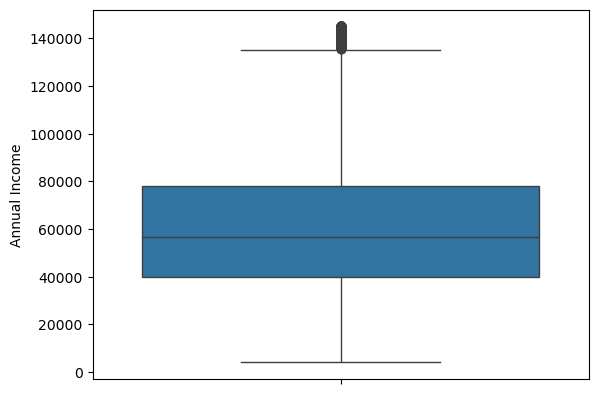

In [177]:
# Create the boxplot after dropping outliers
sns.boxplot(y=loandf['annual_inc'])

# Set plot title and labelsplt.title('Boxplot of Annual Income')
plt.ylabel('Annual Income')
plt.show()

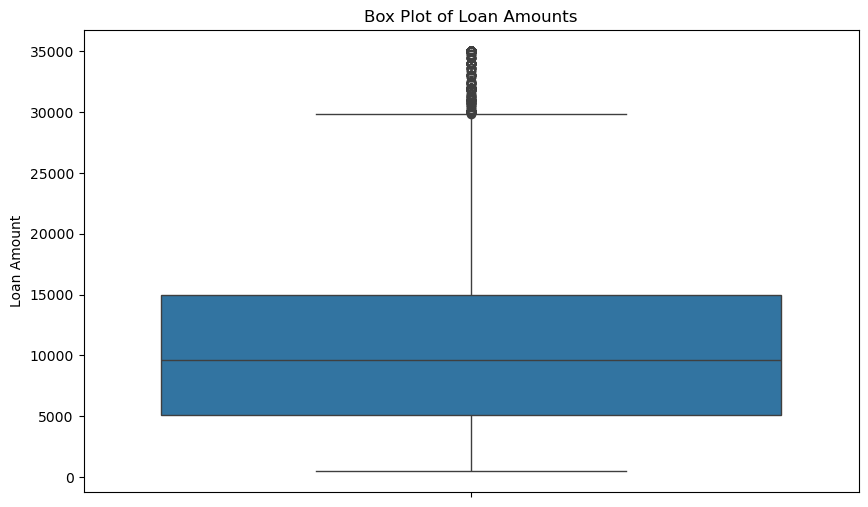

In [178]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(y=loandf['loan_amnt'])

# Add title and labels
plt.title('Box Plot of Loan Amounts')
plt.ylabel('Loan Amount')
plt.xlabel('')

# Show the plot
plt.show()

In [179]:
## we can see that most of the people loan is around 10000 and 556 people has loan amount more than 32000
loandf[loandf.loan_amnt>32000].shape

(556, 26)

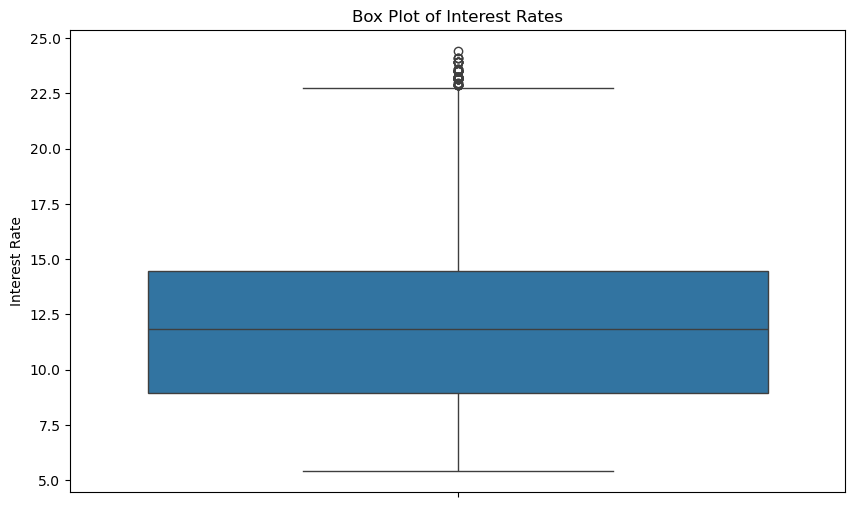

In [180]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot for interest rates
sns.boxplot(y=loandf['int_rate'])

# Add title and labels
plt.title('Box Plot of Interest Rates')
plt.ylabel('Interest Rate')
plt.xlabel('')

# Show the plot
plt.show()

In [181]:
# Calculate the first and third quartiles (Q1 and Q3)
quartiles = np.percentile(loandf['int_rate'], [25, 75])

# Calculate the interquartile range (IQR)
iqr = quartiles[1] - quartiles[0]

# Calculate the upper bound for outliers
upper_bound = quartiles[1] + (iqr * 1.5)

# Output results
print(f"Interquartile Range (IQR): {iqr}")
print(f"Upper Bound for Outliers: {upper_bound}")

Interquartile Range (IQR): 5.520000000000001
Upper Bound for Outliers: 22.740000000000002


In [182]:
# Drop rows where interest rate exceeds the upper bound
outlier_count = loandf[(loandf['int_rate'] > upper_bound)].shape[0]
loandf.drop(loandf[loandf['int_rate'] > upper_bound].index, inplace=True)

# Output the number of outliers removed
print(f"Number of outliers removed: {outlier_count}")

Number of outliers removed: 48


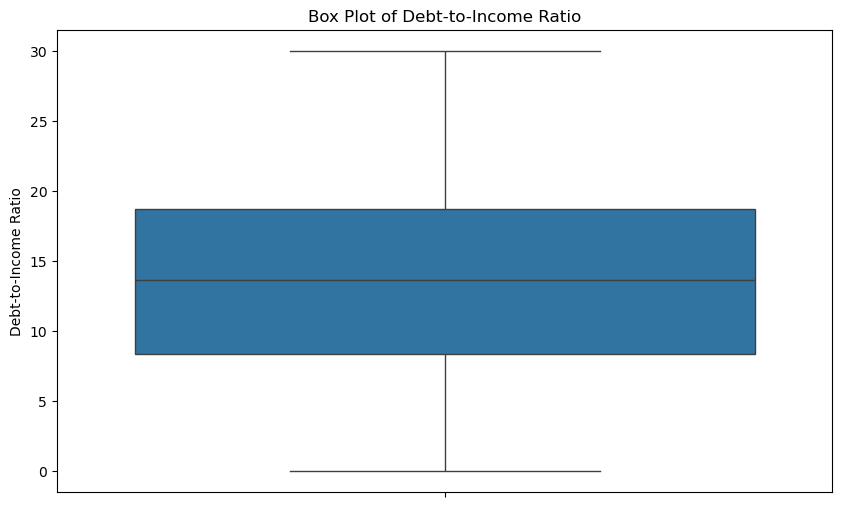

In [183]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot for debt-to-income ratio
sns.boxplot(y=loandf['dti'])

# Add title and labels
plt.title('Box Plot of Debt-to-Income Ratio')
plt.ylabel('Debt-to-Income Ratio')
plt.xlabel('')

# Show the plot
plt.show()

In [184]:
## Mean of customers dti is around 13.5
loandf.dti.describe()

count    37777.000000
mean        13.484823
std          6.666039
min          0.000000
25%          8.390000
50%         13.620000
75%         18.750000
max         29.990000
Name: dti, dtype: float64

##### More people prefer 36 month loan that 60 month.
##### Below graph shows distribution of loan based on loan status and loan term.

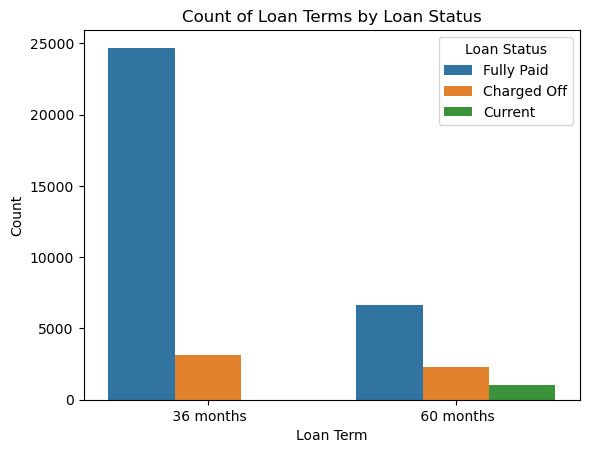

In [186]:
# Create the count plot for loan terms with hue for loan status
sns.countplot(x='term', hue='loan_status', data=loandf)

# Add title and labels
plt.title('Count of Loan Terms by Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Count')

# Show the plot
plt.legend(title='Loan Status')
plt.show()

##### Below graph shows destibution of loan base on their grade and for each grade it also shows distibution on loan based on loan status.
##### A grade and B grade loans are more preferable as they are more secure 

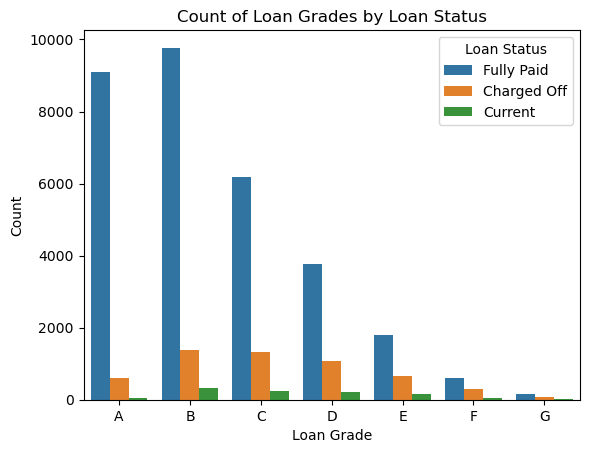

In [188]:
# Create the count plot for loan grades with hue for loan status
sns.countplot(
    x='grade',
    hue='loan_status',
    data=loandf,
    order=loandf['grade'].value_counts().index.sort_values()
)

# Add title and labels
plt.title('Count of Loan Grades by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')

# Show the legend with a title
plt.legend(title='Loan Status')
plt.show()

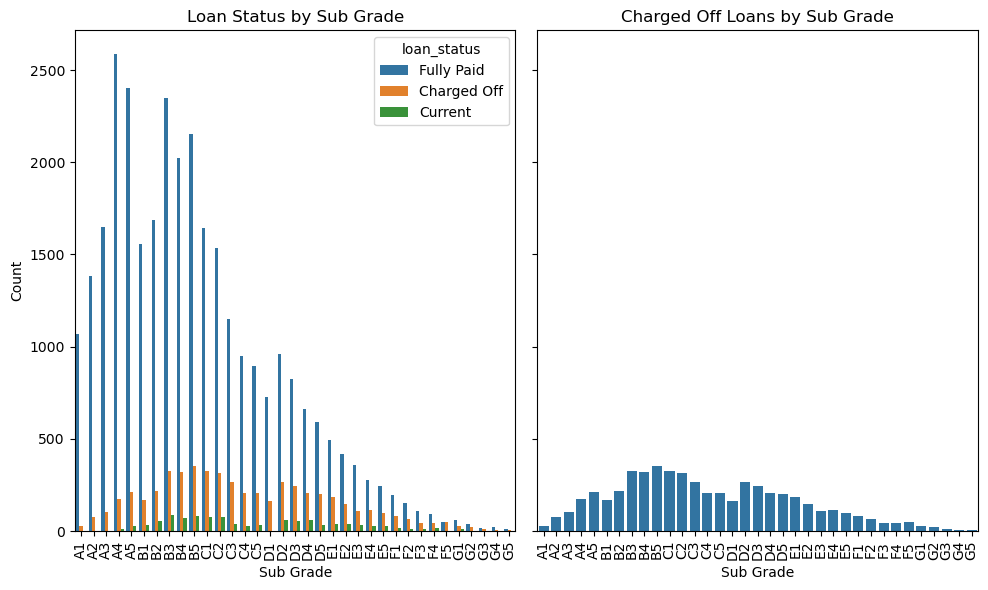

In [189]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True)

# Rotate x-tick labels for both axes
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Count plot for all loan statuses
sns.countplot(x=loandf.sub_grade,hue=loandf.loan_status,order=loandf.sub_grade.value_counts().index.sort_values(),ax=ax[0])

ax[0].set_title('Loan Status by Sub Grade')
ax[0].set_xlabel('Sub Grade')
ax[0].set_ylabel('Count')

# Filter for charged-off loans and count plot
ch = loandf[loandf['loan_status'] == "Charged Off"]
sns.countplot(x=ch.sub_grade,order=sorted(ch.sub_grade.unique()),ax=ax[1])

ax[1].set_title('Charged Off Loans by Sub Grade')
ax[1].set_xlabel('Sub Grade')
ax[1].set_ylabel('Count')

plt.xticks(rotation=90)
# Show the plot
plt.show()

In [190]:
## Left graph shows absulute distibution of loan in sub grade 
## right graph shows absolute distrubution of default loans in sub grade

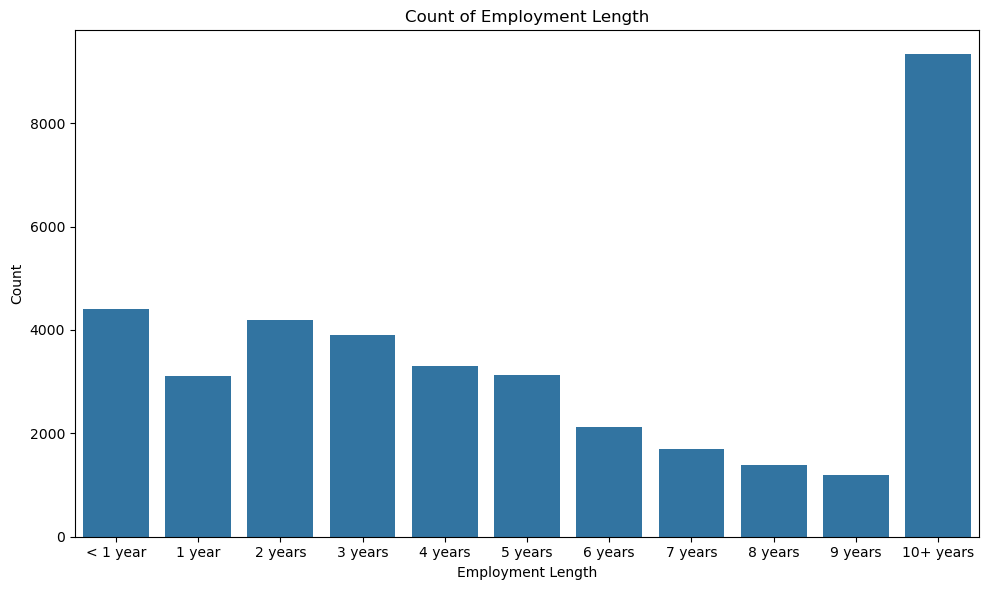

In [191]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot for employment length
sns.countplot(
    x='emp_length',
    order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
    data=loandf
)

# Add title and labels
plt.title('Count of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')

# Show the plot
plt.show()

In [192]:
## More loan is taken by 10+ year people

In [193]:
# Display the value counts for home ownership
loandf.home_ownership.value_counts()

home_ownership
RENT        18411
MORTGAGE    16338
OWN          2934
OTHER          91
NONE            3
Name: count, dtype: int64

In [194]:
# None is not a valid values for home ownership so we can  assign the equivalnet valid values which is OTHER

In [195]:
# Replace 'NONE' with 'OTHER'
loandf['home_ownership'] = loandf['home_ownership'].apply(lambda x: "OTHER" if x == "NONE" else x)

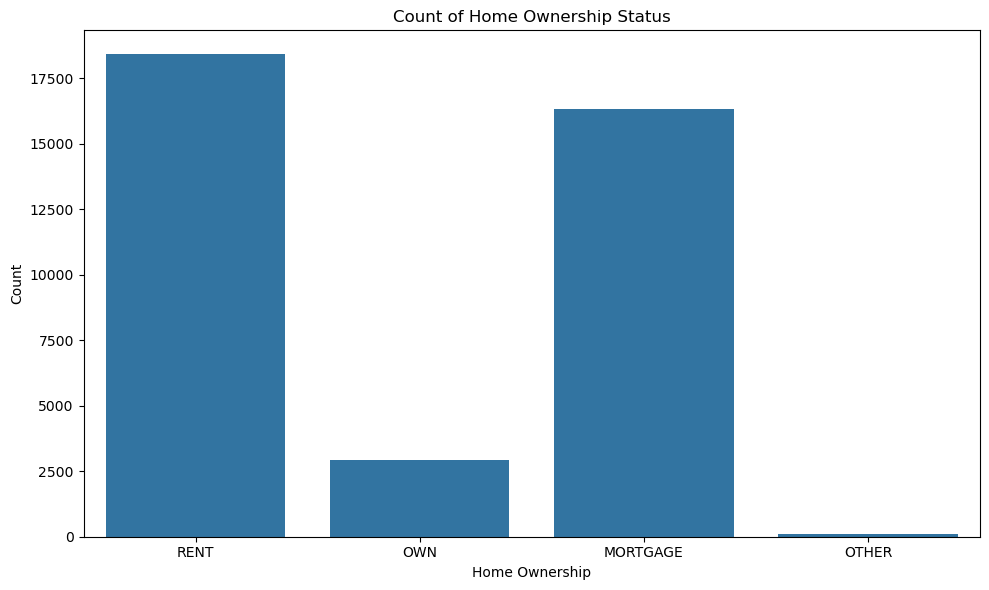

In [196]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot for home ownership
sns.countplot(x='home_ownership', data=loandf)

# Add title and labels
plt.title('Count of Home Ownership Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')

# Show the plot
plt.show()

In [197]:
## People  on Rent or Mortgage  have taken more loan

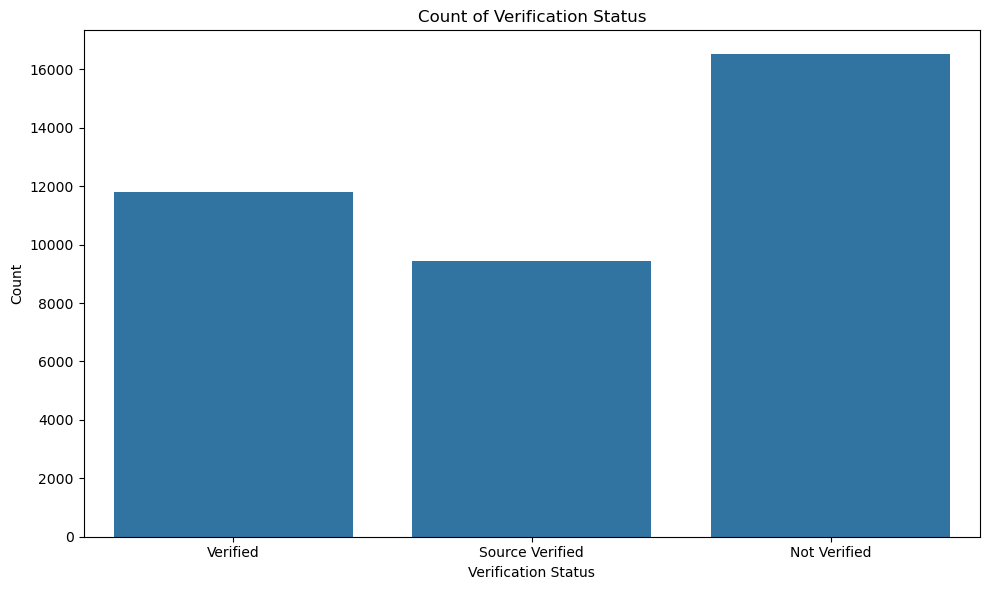

In [198]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot for verification status
sns.countplot(x='verification_status', data=loandf)

# Add title and labels
plt.title('Count of Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')

# Show the plot
plt.show()

In [199]:
## Most loans are varified or their income source are verified 

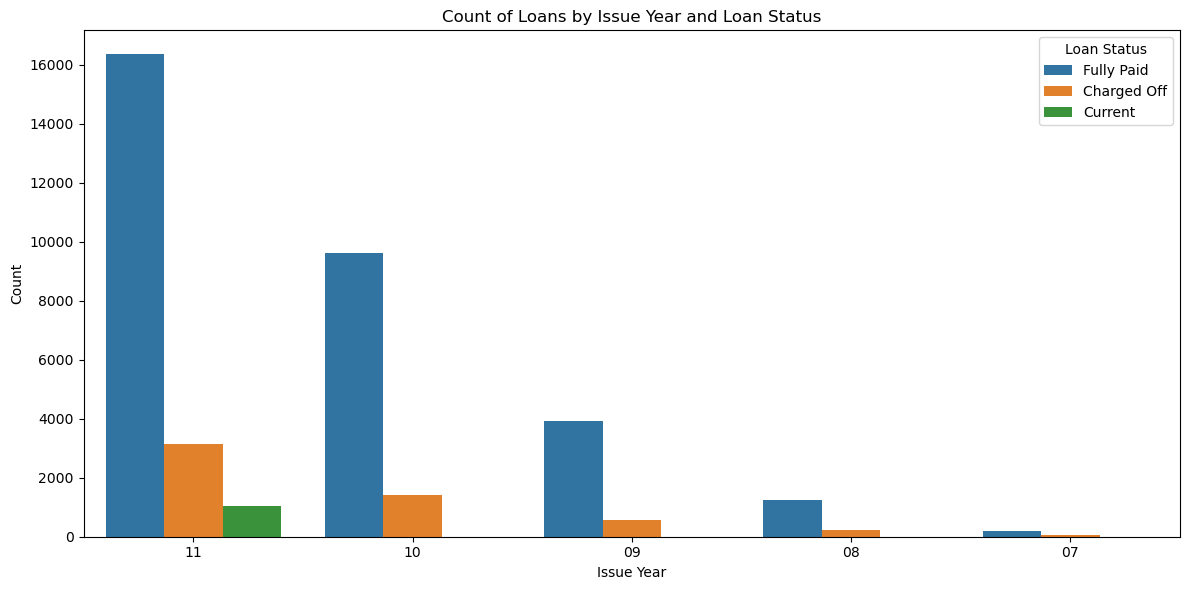

In [200]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the count plot for issue year with hue for loan status
sns.countplot(x='issue_year', hue='loan_status', data=loandf)

# Add title and labels
plt.title('Count of Loans by Issue Year and Loan Status')
plt.xlabel('Issue Year')
plt.ylabel('Count')

# Show the legend with a title
plt.legend(title='Loan Status')

# Show the plot
plt.show()

In [201]:
## More loan were issued in 2011
## number of loans have incresed from 2007 to 2011

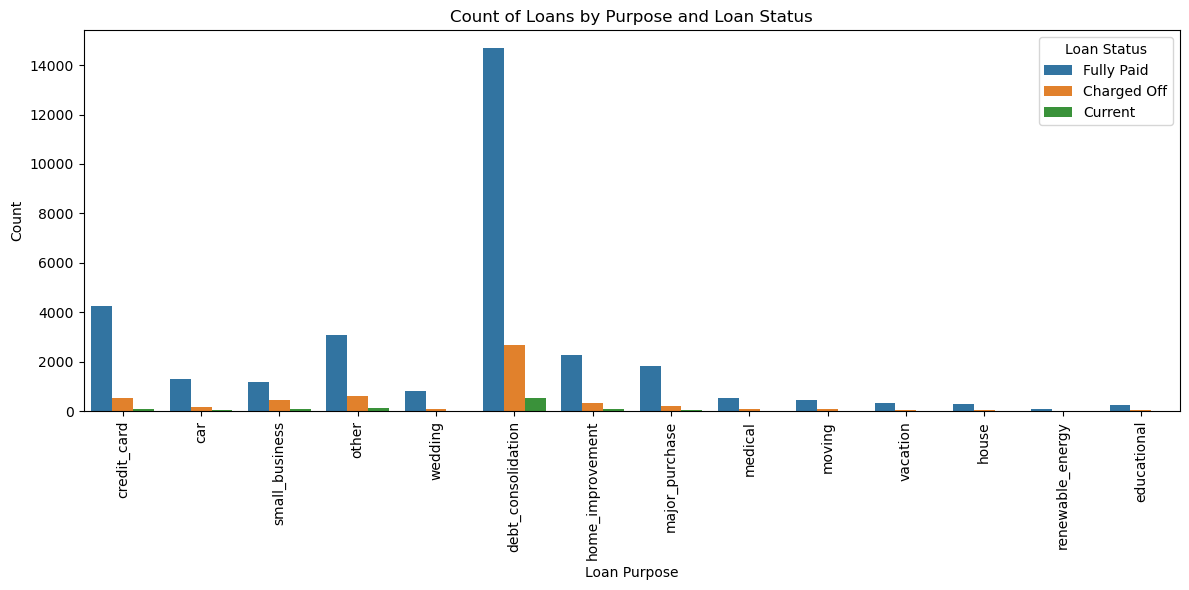

In [202]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the count plot for loan purpose with hue for loan status
sns.countplot(x='purpose', hue='loan_status', data=loandf)

# Rotate x-tick labels for better visibility
plt.xticks(rotation=90)

# Add title and labels
plt.title('Count of Loans by Purpose and Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')

# Show the legend with a title
plt.legend(title='Loan Status')

# Show the plot
plt.show()

In [203]:
## Most loans are taken for either debt consolidation or credit card repayments 

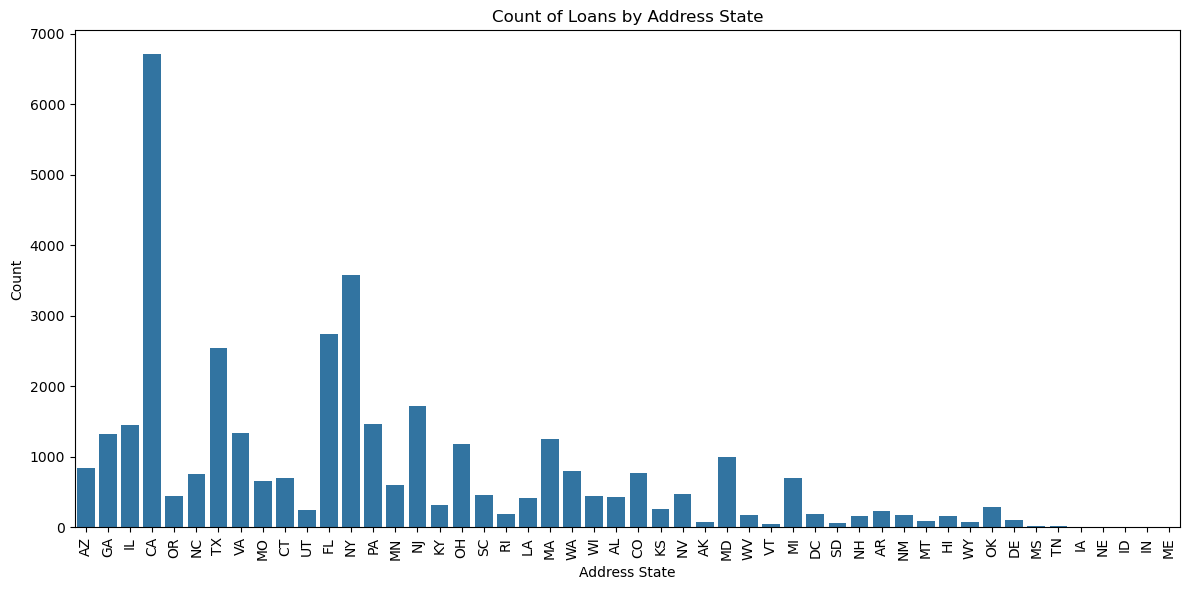

In [204]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the count plot for address state
sns.countplot(x='addr_state', data=loandf)

# Rotate x-tick labels for better visibility
plt.xticks(rotation=90)

# Add title and labels
plt.title('Count of Loans by Address State')
plt.xlabel('Address State')
plt.ylabel('Count')

# Show the plot
plt.show()

In [205]:
## Most borrower are from CA, California 

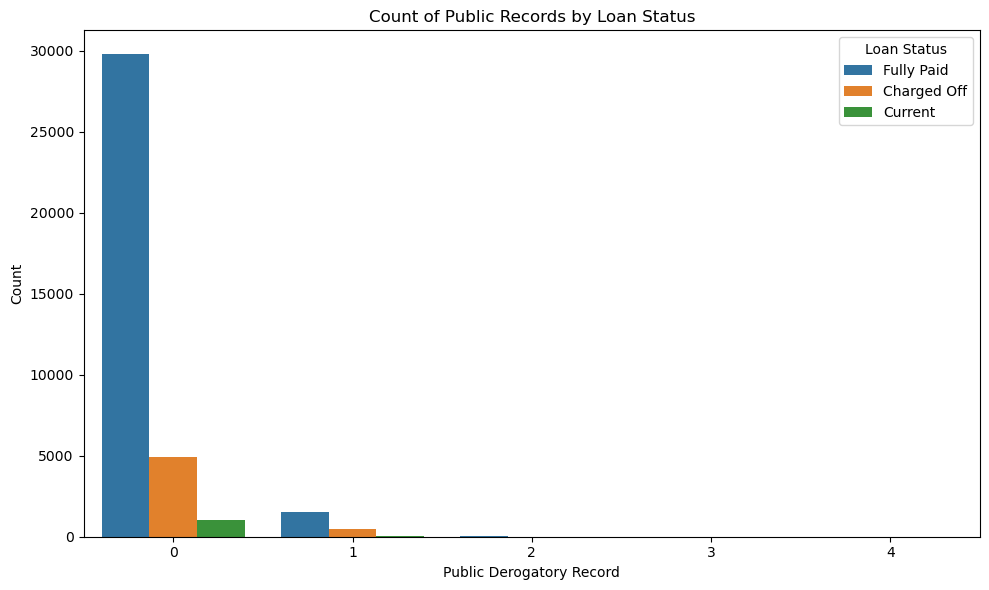

In [372]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot for public records with hue for loan status
sns.countplot(x='pub_rec', hue='loan_status', data=loandf)

# Add title and labels
plt.title('Count of Public Records by Loan Status')
plt.xlabel('Public Derogatory Record')
plt.ylabel('Count')

# Show the legend with a title
plt.legend(title='Loan Status')

# Show the plot
plt.show()

In [207]:
## Most borrower are not having any derogatory public records

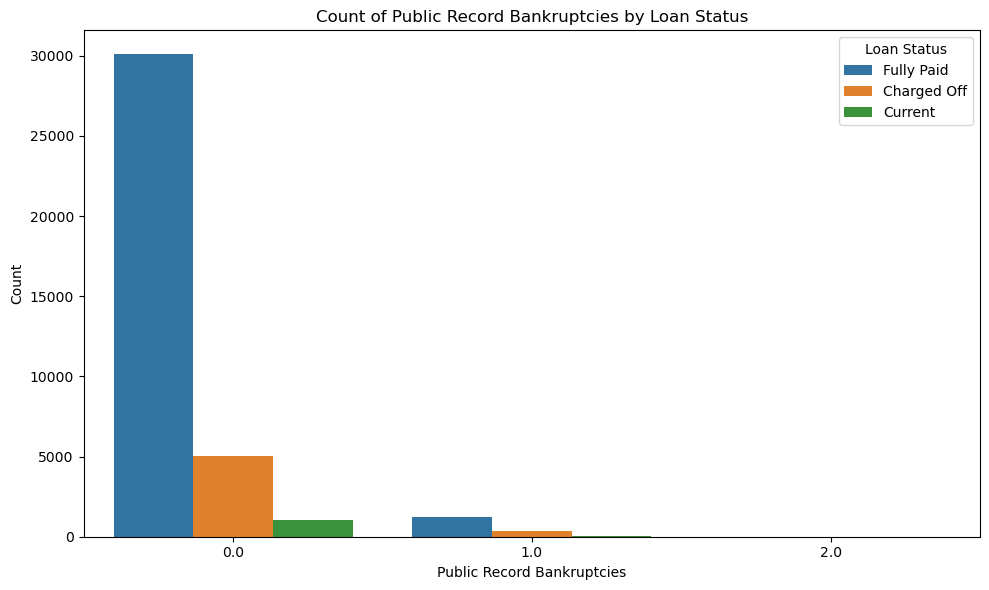

In [208]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot for public record bankruptcies with hue for loan status
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=loandf)

# Add title and labels
plt.title('Count of Public Record Bankruptcies by Loan Status')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Count')

# Show the legend with a title
plt.legend(title='Loan Status')

# Show the plot
plt.show()

In [209]:
## Most borrower dont have public record bankruptcies

## BiVariate Analysis

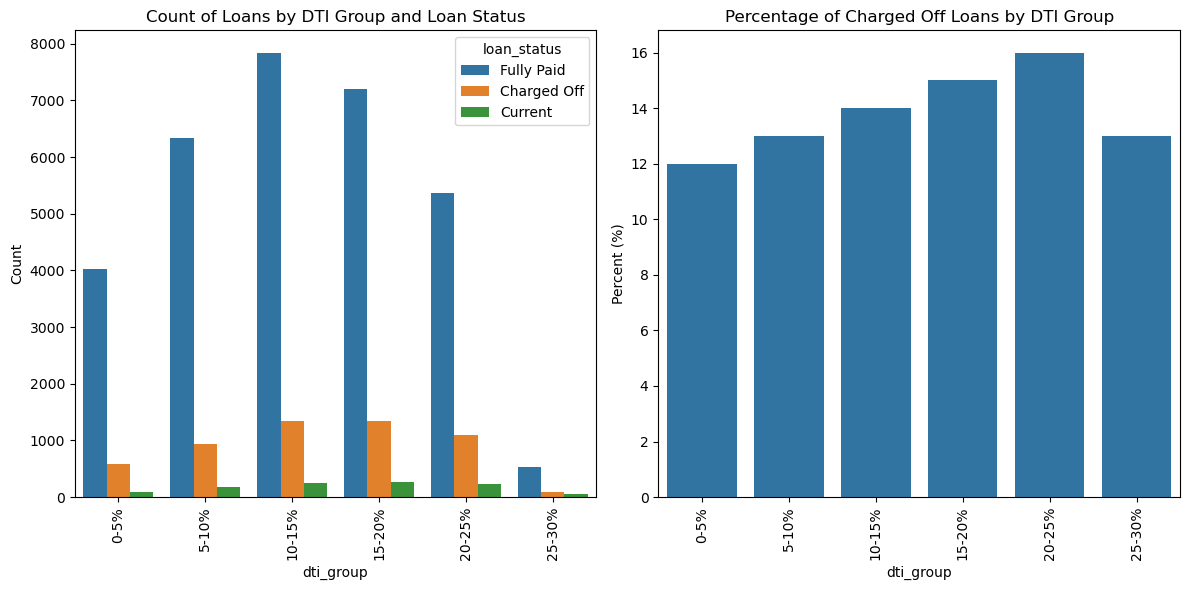

In [211]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [12.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Count plot for DTI group with hue for loan status
sns.countplot(
    x='dti_group',
    hue='loan_status',
    order=["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "25-30%"],
    data=loandf,
    ax=ax[0]
)
ax[0].set_title('Count of Loans by DTI Group and Loan Status')
ax[0].set_ylabel('Count')

# Calculate percentage of charged-off loans per DTI group
o = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "25-30%"]
percentages = [
    round((len(loandf[(loandf.dti_group == oo) & (loandf.loan_status == "Charged Off")]) /
            len(loandf[(loandf.dti_group == oo)])), 2) * 100 for oo in o
]

# Bar plot for percentage of charged-off loans
sns.barplot(x=o, y=percentages, ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by DTI Group')
ax[1].set_ylabel('Percent (%)')
ax[1].set_xlabel('dti_group')
# Show the plot
plt.xticks(rotation=90)
plt.show()

#### we can see that  probability  of getting default increase as the dti ratio increases.


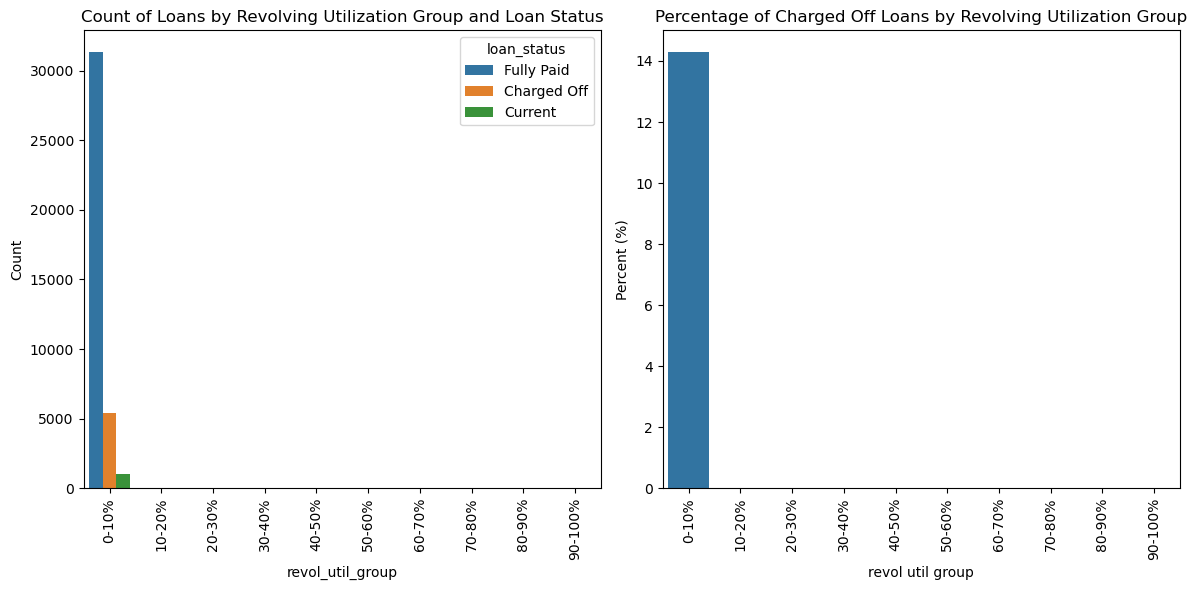

In [213]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [12.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Count plot for revolving utilization group with hue for loan status
sns.countplot(
    x='revol_util_group',
    hue='loan_status',
    order=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%",
           "60-70%", "70-80%", "80-90%", "90-100%"],
    data=loandf,
    ax=ax[0]
)
ax[0].set_title('Count of Loans by Revolving Utilization Group and Loan Status')
ax[0].set_ylabel('Count')

# Calculate percentage of charged-off loans per revolving utilization group
utilization_groups = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", 
                      "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]
percentages = []

for oo in utilization_groups:
    charged_off_count = len(loandf[(loandf.revol_util_group == oo) & 
                                    (loandf.loan_status == "Charged Off")])
    total_count = len(loandf[(loandf.revol_util_group == oo)])
    
    if total_count > 0:
        percentages.append(round((charged_off_count / total_count) * 100, 2))
    else:
        percentages.append(0)  # Append 0 if total_count is zero

# Bar plot for percentage of charged-off loans
sns.barplot(x=utilization_groups, y=percentages, ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by Revolving Utilization Group')
ax[1].set_ylabel('Percent (%)')
ax[1].set_xlabel('revol util group')

# Show the plot
plt.xticks(rotation=90)
plt.show()

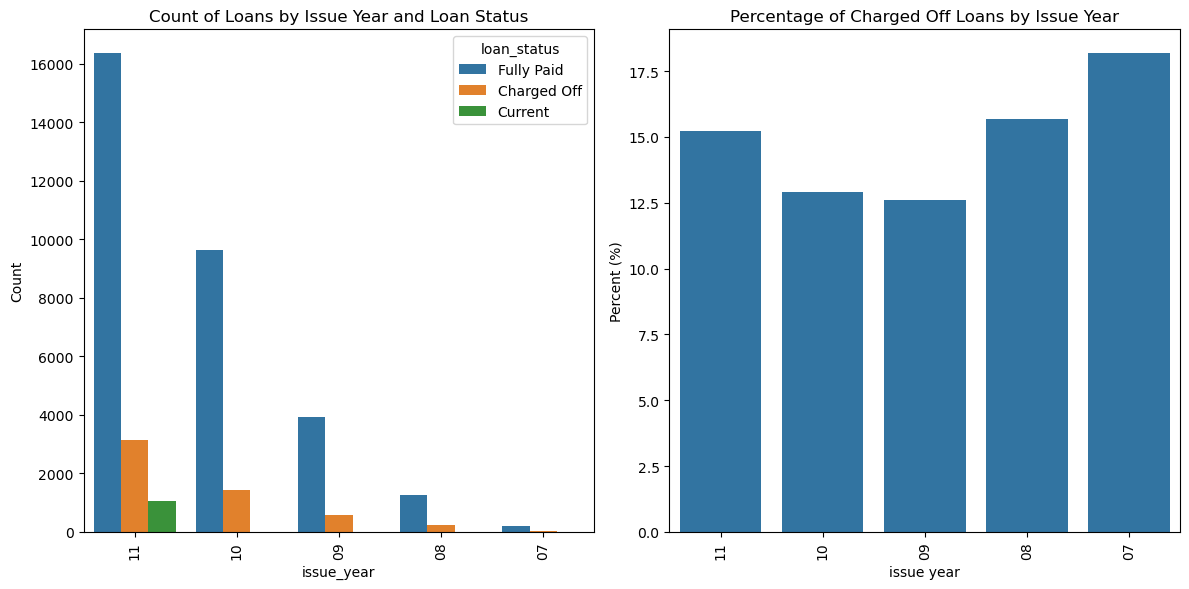

In [214]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [12.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Count plot for issue year with hue for loan status
sns.countplot(x='issue_year', hue='loan_status', data=loandf, ax=ax[0])
ax[0].set_title('Count of Loans by Issue Year and Loan Status')
ax[0].set_ylabel('Count')

# Define years and calculate percentage of charged-off loans
years = ['11', '10', '09', '08', '07']
percentages = []

for year in years:
    charged_off_count = len(loandf[(loandf.issue_year == year) & 
                                    (loandf.loan_status == "Charged Off")])
    total_count = len(loandf[loandf.issue_year == year])
    
    # Check for division by zero
    if total_count > 0:
        percentages.append(round((charged_off_count / total_count) * 100, 2))
    else:
        percentages.append(0)  # Append 0 if total_count is zero

# Bar plot for percentage of charged-off loans
sns.barplot(x=years, y=percentages, ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by Issue Year')
ax[1].set_ylabel('Percent (%)')
ax[1].set_xlabel('issue year')
plt.xticks(rotation=90)
plt.show()

In [215]:
# We can see that major loans we taken in 2011 and 2010 but most of the relative
# loan defaulter  were there in 2007 and 2008 that is pre kicking of 2008 crices 
# and then again in 2011

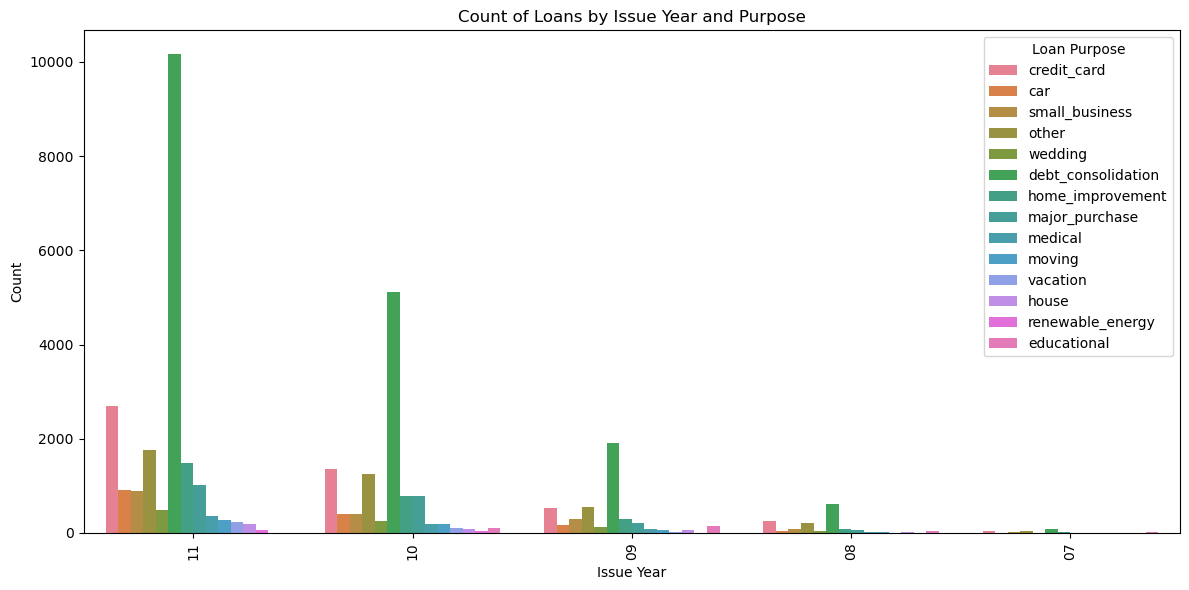

In [216]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the count plot for issue year with hue for loan purpose
sns.countplot(x='issue_year', hue='purpose', data=loandf)

# Add title and labels
plt.title('Count of Loans by Issue Year and Purpose')
plt.xlabel('Issue Year')
plt.ylabel('Count')

# Show the legend with a title
plt.legend(title='Loan Purpose')

# Rotate x-tick labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [217]:
#from 2011 to 2008  major loans were taken for debt consolidation


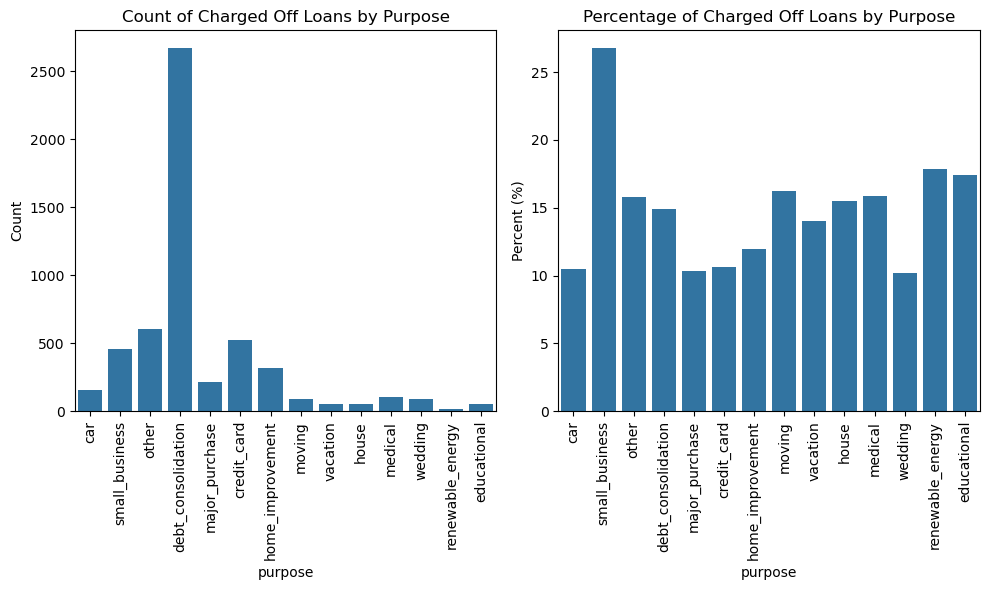

In [218]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Filter for charged-off loans
charged_off_loans = loandf[loandf.loan_status == "Charged Off"]

# Count plot for purposes of charged-off loans
sns.countplot(x='purpose', data=charged_off_loans, ax=ax[0])
ax[0].set_title('Count of Charged Off Loans by Purpose')
ax[0].set_ylabel('Count')

# Calculate percentage of charged-off loans per purpose
purposes = loandf.purpose.value_counts().index
percentages = []

for purpose in purposes:
    charged_off_count = len(loandf[(loandf.purpose == purpose) & 
                                    (loandf.loan_status == "Charged Off")])
    total_count = len(loandf[loandf.purpose == purpose])
    
    # Check for division by zero
    if total_count > 0:
        percentages.append(round((charged_off_count / total_count) * 100, 2))
    else:
        percentages.append(0)  # Append 0 if total_count is zero

# Bar plot for percentage of charged-off loans
sns.barplot(x=purposes, y=percentages, ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by Purpose')
ax[1].set_ylabel('Percent (%)')
plt.xticks(rotation=90)
plt.show()

In [219]:
# if we see absolutly then loan takem for debt consolidation has high chances for defaulting but number of total laon taken 
# for debt consolidation is also high.
# but if we see relatively each category of purpose then laon taken for small business has high probabilty of getting default

In [220]:
# Get the unique loan purposes
loan_purposes = loandf.purpose.value_counts().index

# Calculate the percentage of charged-off loans for each purpose
charged_off_percentages = [
    {
        'purpose': purpose,
        'percentage': round(
            (len(loandf[(loandf.purpose == purpose) & (loandf.loan_status == "Charged Off")]) /
             len(loandf[loandf.purpose == purpose]) * 100), 2) if len(loandf[loandf.purpose == purpose]) > 0 else 0
    } for purpose in loan_purposes
]

# Output the results
charged_off_percentages

[{'purpose': 'debt_consolidation', 'percentage': 14.91},
 {'purpose': 'credit_card', 'percentage': 10.63},
 {'purpose': 'other', 'percentage': 15.77},
 {'purpose': 'home_improvement', 'percentage': 11.99},
 {'purpose': 'major_purchase', 'percentage': 10.36},
 {'purpose': 'small_business', 'percentage': 26.74},
 {'purpose': 'car', 'percentage': 10.45},
 {'purpose': 'wedding', 'percentage': 10.18},
 {'purpose': 'medical', 'percentage': 15.87},
 {'purpose': 'moving', 'percentage': 16.22},
 {'purpose': 'vacation', 'percentage': 14.02},
 {'purpose': 'house', 'percentage': 15.47},
 {'purpose': 'educational', 'percentage': 17.42},
 {'purpose': 'renewable_energy', 'percentage': 17.89}]

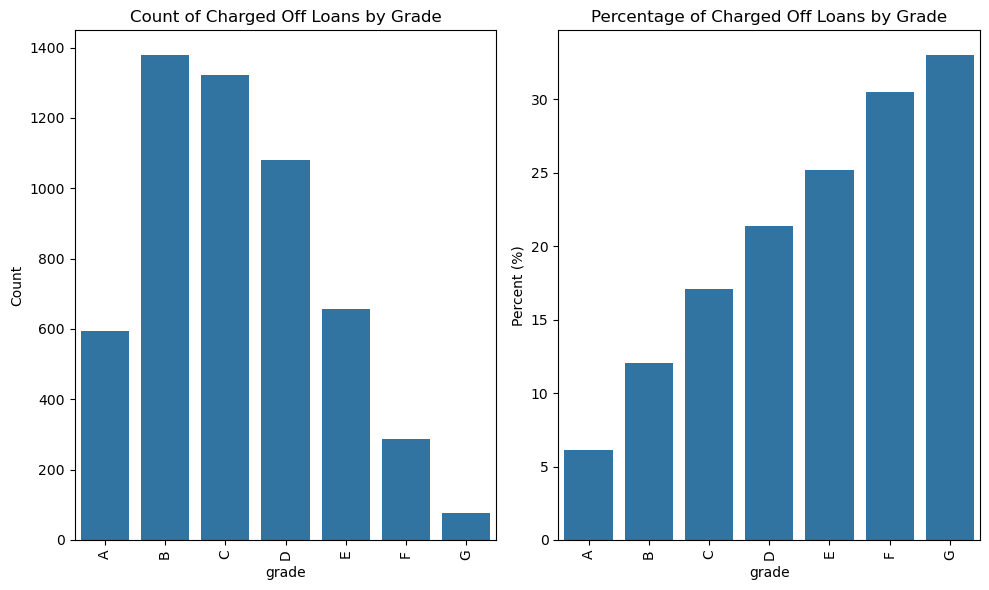

In [221]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Filter for charged-off loans
charged_off_loans = loandf[loandf.loan_status == "Charged Off"]

# Count plot for grades of charged-off loans
sns.countplot(x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], data=charged_off_loans, ax=ax[0])
ax[0].set_title('Count of Charged Off Loans by Grade')
ax[0].set_ylabel('Count')

# Calculate percentage of charged-off loans per grade
grades = loandf.grade.value_counts().index
percentages = []

for grade in grades:
    charged_off_count = len(loandf[(loandf.grade == grade) & 
                                    (loandf.loan_status == "Charged Off")])
    total_count = len(loandf[loandf.grade == grade])
    
    # Check for division by zero
    if total_count > 0:
        percentages.append(round((charged_off_count / total_count) * 100, 2))
    else:
        percentages.append(0)  # Append 0 if total_count is zero

# Bar plot for percentage of charged-off loans
sns.barplot(x=grades, y=percentages, ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by Grade')
ax[1].set_ylabel('Percent (%)')

# Show the plot
plt.xticks(rotation=90)
plt.show()



In [222]:
# if we see absolutly then B,Cand D grade loan have defaulted most
# but if we see relatively each grade then moving from A to G probabilty of loan getting defaut increases.

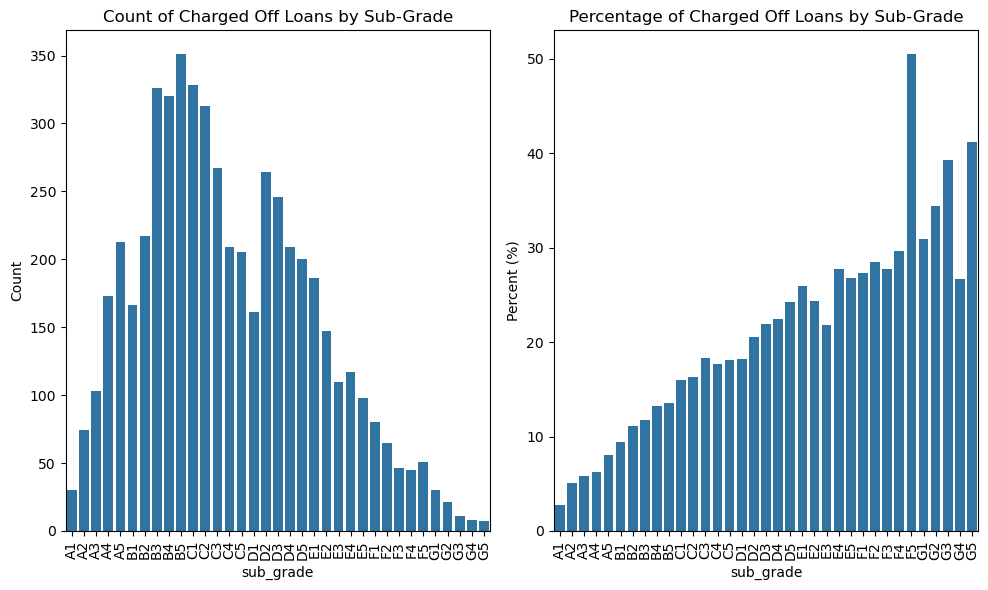

In [223]:

# Set default figure size and layout
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Filter for charged-off loans
charged_off_loans = loandf[loandf.loan_status == "Charged Off"]

# Count plot for sub-grades of charged-off loans
sns.countplot(x='sub_grade', order=sorted(charged_off_loans.sub_grade.unique()), data=charged_off_loans, ax=ax[0])
ax[0].set_title('Count of Charged Off Loans by Sub-Grade')
ax[0].set_ylabel('Count')

# Calculate percentage of charged-off loans per sub-grade
sub_grades = loandf.sub_grade.value_counts().index
percentages = []

for sub_grade in sub_grades:
    charged_off_count = len(loandf[(loandf.sub_grade == sub_grade) & 
                                    (loandf.loan_status == "Charged Off")])
    total_count = len(loandf[loandf.sub_grade == sub_grade])
    
    # Check for division by zero
    if total_count > 0:
        percentages.append(round((charged_off_count / total_count) * 100, 2))
    else:
        percentages.append(0)  # Append 0 if total_count is zero

# Bar plot for percentage of charged-off loans
sns.barplot(x=sub_grades, y=percentages, ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by Sub-Grade')
ax[1].set_ylabel('Percent (%)')

# Show the plot

plt.xticks(rotation=90)
plt.show()

In [224]:
## F5 sub category has highest porbabilty of getting default

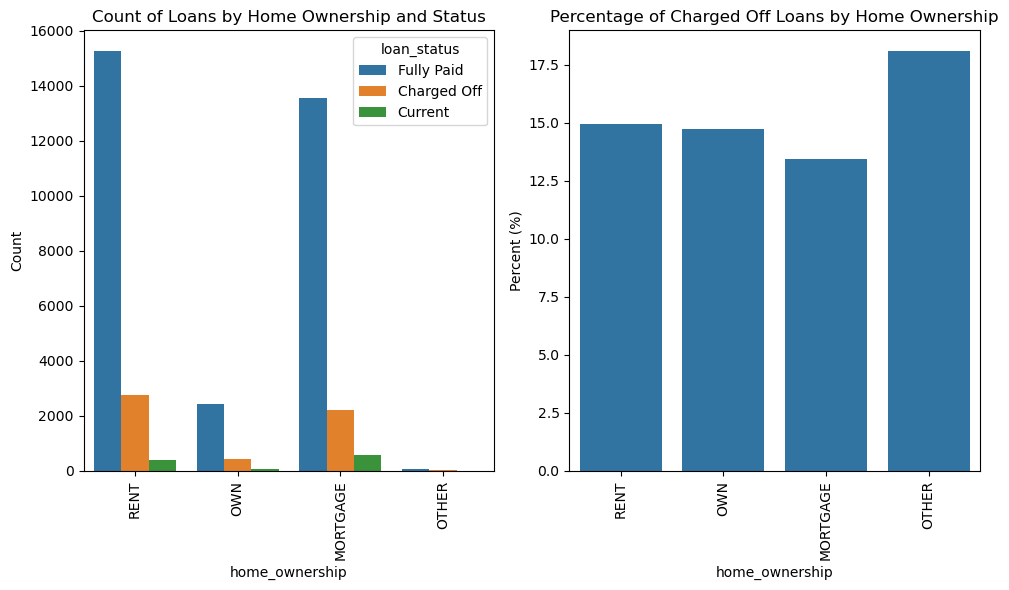

In [225]:

# Set default figure size and layout
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Count plot for home ownership with hue for loan status
sns.countplot(x='home_ownership', hue='loan_status', data=loandf, ax=ax[0])
ax[0].set_title('Count of Loans by Home Ownership and Status')
ax[0].set_ylabel('Count')

# Calculate percentage of charged-off loans by home ownership
home_ownerships = loandf.home_ownership.value_counts().index
charged_off_percentages = []

for ownership in home_ownerships:
    charged_off_count = len(loandf[(loandf.home_ownership == ownership) & 
                                    (loandf.loan_status == "Charged Off")])
    total_count = len(loandf[loandf.home_ownership == ownership])
    
    # Check for division by zero
    if total_count > 0:
        charged_off_percentages.append(round((charged_off_count / total_count) * 100, 2))
    else:
        charged_off_percentages.append(0)  # Append 0 if total_count is zero

# Bar plot for percentage of charged-off loans
sns.barplot(x=home_ownerships, y=charged_off_percentages, ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by Home Ownership')
ax[1].set_ylabel('Percent (%)')

# Show the plot
plt.xticks(rotation=90)
plt.show()

In [226]:
## we can see from right graph that "other" is having high pobabilty of getting default but since the data for this category is very less 
## we can ignore it , keeping that in mind we see that for lage set of borrower "home ownwership" does not play vital role 
## in identifying loan defaulters

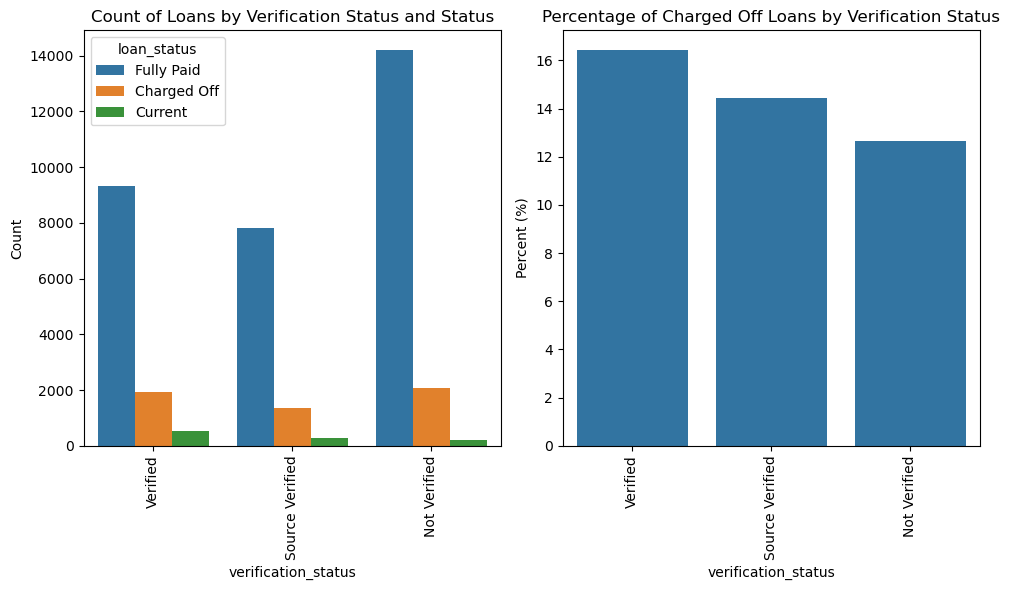

In [227]:


# Set default figure size and layout
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Count plot for verification status with hue for loan status
sns.countplot(x='verification_status', hue='loan_status', data=loandf, ax=ax[0])
ax[0].set_title('Count of Loans by Verification Status and Status')
ax[0].set_ylabel('Count')

# Calculate percentage of charged-off loans by verification status
verification_statuses = loandf.verification_status.value_counts().index
charged_off_percentages = []

for status in verification_statuses:
    charged_off_count = len(loandf[(loandf.verification_status == status) & 
                                    (loandf.loan_status == "Charged Off")])
    total_count = len(loandf[loandf.verification_status == status])
    
    # Check for division by zero
    if total_count > 0:
        charged_off_percentages.append(round((charged_off_count / total_count) * 100, 2))
    else:
        charged_off_percentages.append(0)  # Append 0 if total_count is zero

# Bar plot for percentage of charged-off loans
sns.barplot(x=verification_statuses, y=charged_off_percentages, ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by Verification Status')
ax[1].set_ylabel('Percent (%)')

# Show the plot
plt.xticks(rotation=90)
plt.show()

In [228]:
## Data shows that verified income source , loans are also having high probabilty of failing 

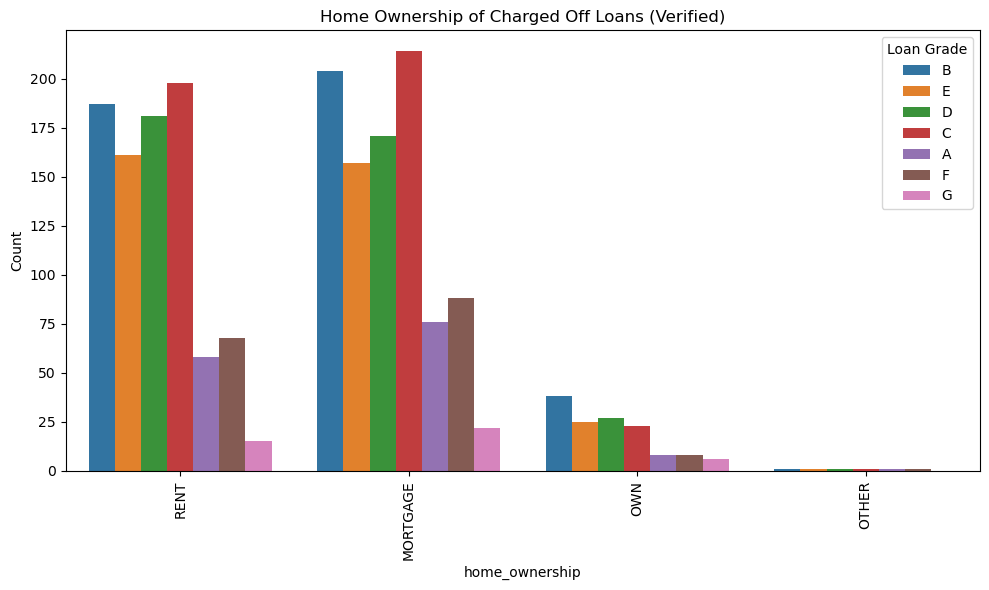

In [229]:
# Filter for charged-off loans that are verified
charged_off_verified = loandf[(loandf.loan_status == "Charged Off") & 
                               (loandf.verification_status == "Verified")]

# Create a count plot for home ownership, with hue for loan grade
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='grade', data=charged_off_verified)
plt.title('Home Ownership of Charged Off Loans (Verified)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Loan Grade')
plt.tight_layout()
plt.show()

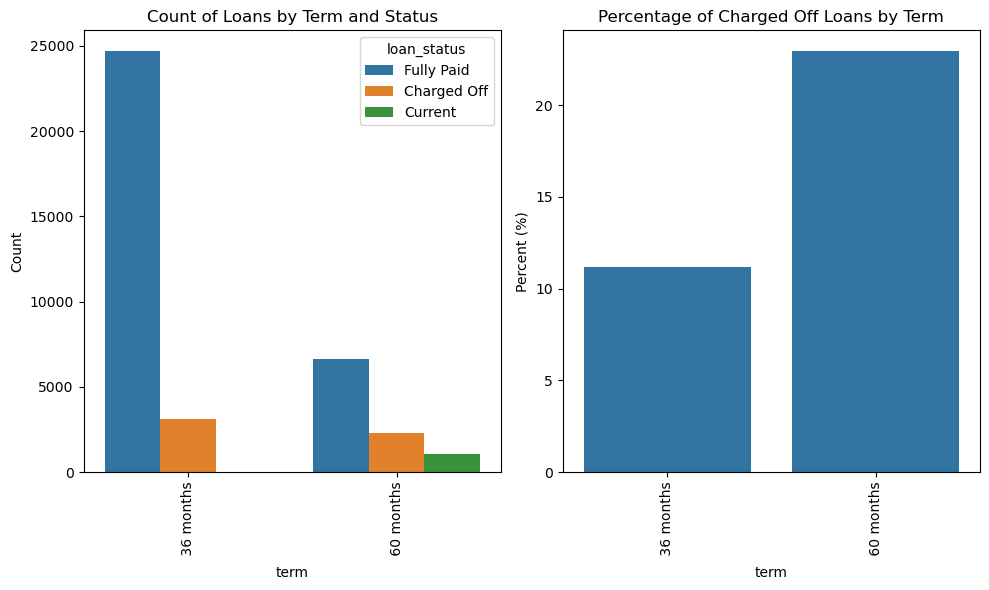

In [230]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Count plot for loan term with hue for loan status
sns.countplot(x='term', hue='loan_status', data=loandf, ax=ax[0])
ax[0].set_title('Count of Loans by Term and Status')
ax[0].set_ylabel('Count')

# Calculate percentage of charged-off loans by term
loan_terms = loandf.term.value_counts().index
charged_off_percentages = []

for term in loan_terms:
    charged_off_count = len(loandf[(loandf.term == term) & 
                                    (loandf.loan_status == "Charged Off")])
    total_count = len(loandf[loandf.term == term])
    
    # Check for division by zero
    if total_count > 0:
        charged_off_percentages.append(round((charged_off_count / total_count) * 100, 2))
    else:
        charged_off_percentages.append(0)  # Append 0 if total_count is zero

# Bar plot for percentage of charged-off loans
sns.barplot(x=loan_terms, y=charged_off_percentages, ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by Term')
ax[1].set_ylabel('Percent (%)')

# Show the plot
plt.xticks(rotation=90)
plt.show()

In [231]:
## from right hand graph we can see that 60 month loan has high chances of getting default

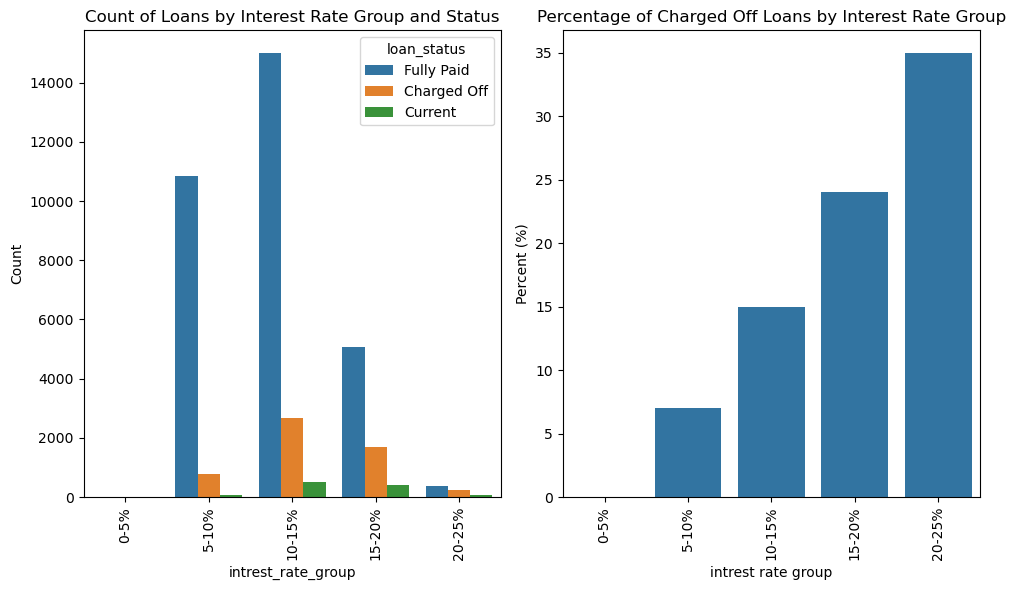

In [232]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

sns.countplot(x=loandf.intrest_rate_group,hue=loandf.loan_status,order=["0-5%","5-10%","10-15%","15-20%","20-25%"],ax=ax[0])
ax[0].set_title('Count of Loans by Interest Rate Group and Status')
ax[0].set_ylabel('Count')


interest_rate_groups=["5-10%","10-15%","15-20%","20-25%"]
charged_off_percentages=[round((len(loandf[(loandf.intrest_rate_group==group) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.intrest_rate_group==group)]),2)*100 for group in interest_rate_groups]
ax[1].set_ylabel('Percent%')

# Bar plot for percentage of charged-off loans
sns.barplot(x=interest_rate_groups,y=charged_off_percentages,ax=ax[1])

ax[1].set_title('Percentage of Charged Off Loans by Interest Rate Group')
ax[1].set_ylabel('Percent (%)')
ax[1].set_xlabel('intrest rate group')

plt.xticks(rotation=90)
plt.show()


In [233]:
# Left graph shows that major borrower have intrest rate b/w 10-15%
# right graph shows as the rate of intrest grows chances of getting loan default increases. We can also say
# that defaulters have high rate of intrest 

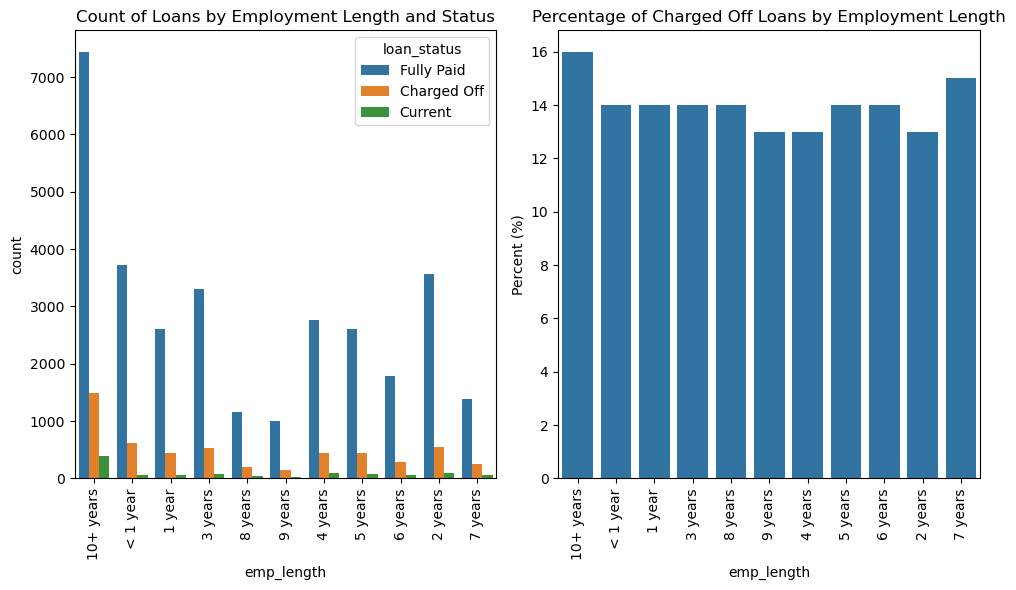

In [234]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

# Count plot for employment length with hue for loan status
sns.countplot(x=loandf.emp_length,hue=loandf.loan_status,ax=ax[0])
ax[0].set_title('Count of Loans by Employment Length and Status')


employment_lengths = loandf.emp_length.value_counts().index

charged_off_percentages=[round((len(loandf[(loandf.emp_length==length) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.emp_length==length)]),2)*100 for length in employment_lengths]


sns.barplot(x=employment_lengths,y=charged_off_percentages,ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by Employment Length')
ax[1].set_ylabel('Percent (%)')

plt.xticks(rotation=90)
plt.show()

In [235]:
# we can see that from left graph that 10+ years people have taken more loan  due to which default count 
# and full pay count both are high  from other expeience group,but
# when we check each group relatively that  total how many loans each experience group has takean and out
# of that how many got defaulted we see that 10+ year is not very significantly high 
# rather in general no of year of experiece does not play very vital role in pridicting defaulters
# we can just say that 10+ year could be put in amber zone

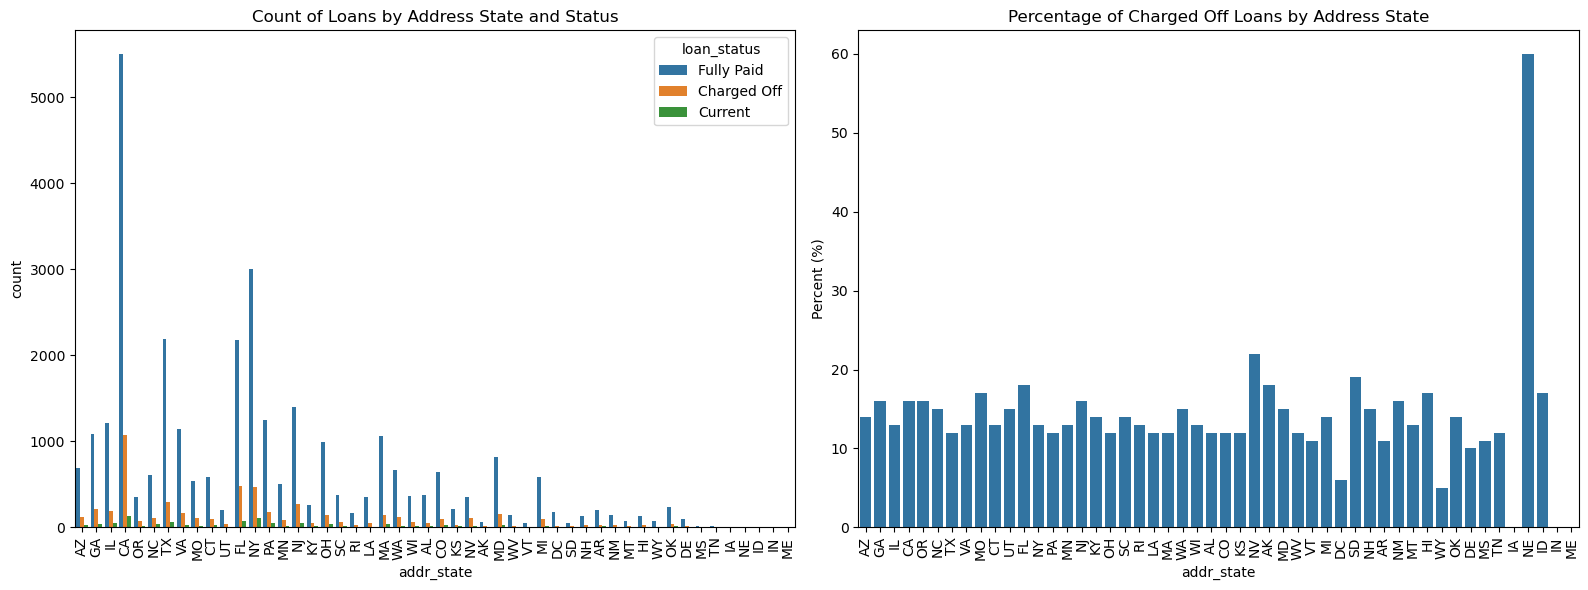

In [236]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [16.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

sns.countplot(x=loandf.addr_state,hue=loandf.loan_status,ax=ax[0])
ax[0].set_title('Count of Loans by Address State and Status')

addr_states = loandf.addr_state.value_counts().index
charged_off_percentages=[round((len(loandf[(loandf.addr_state==state) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.addr_state==state)]),2)*100 for state in addr_states]

sns.barplot(x=addr_states,y=charged_off_percentages,ax=ax[1])

ax[1].set_title('Percentage of Charged Off Loans by Address State')
ax[1].set_ylabel('Percent (%)')

plt.xticks(rotation=90)
plt.show()

In [237]:
# from left graph we see that most borrowers are from CA,California but from right graph 
# we see that borrower from NEBRASKA,NE relativly have more chances to get default but since the data for NE,NEBRASKA
# is very less we can ignore that spike and then can conclude that addess  state does not have any vital role
# in identifying defaulters

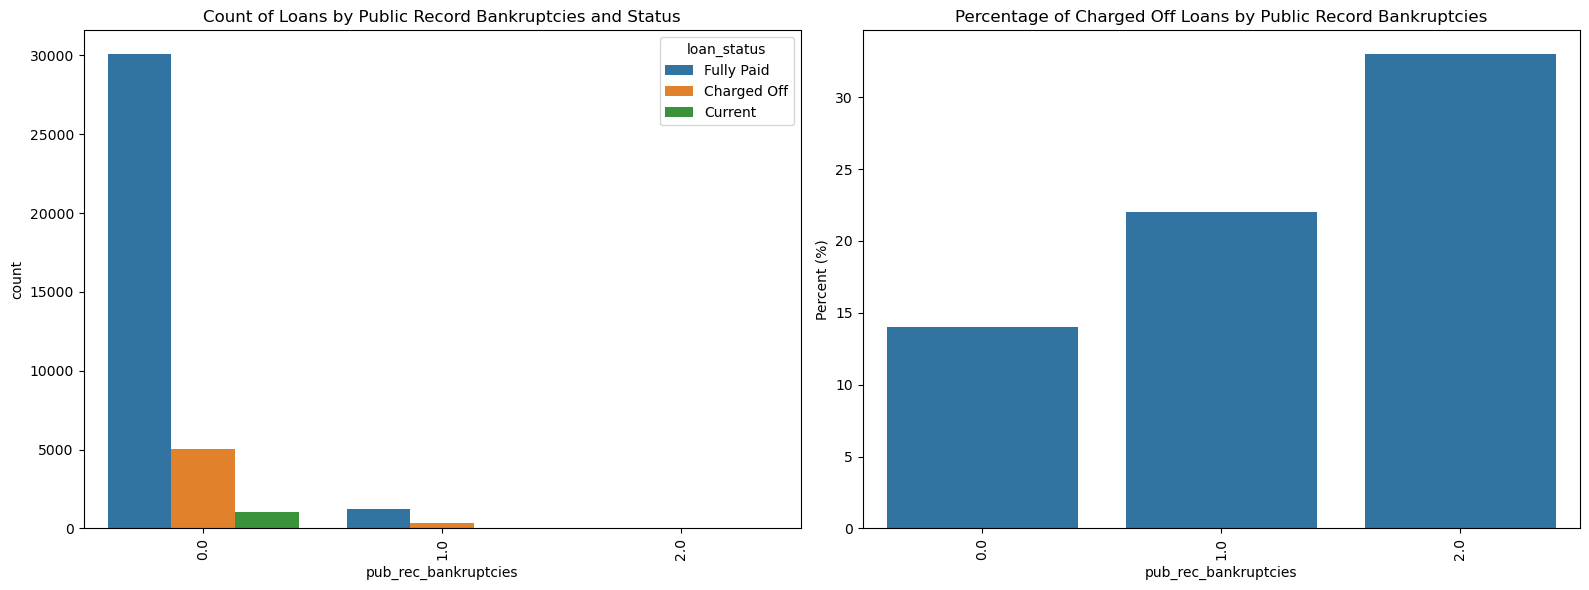

In [238]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [16.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

sns.countplot(x=loandf.pub_rec_bankruptcies,hue=loandf.loan_status,ax=ax[0])
ax[0].set_title('Count of Loans by Public Record Bankruptcies and Status')

pub_rec_bankrupty_values=loandf.pub_rec_bankruptcies .value_counts().index
charged_off_percentages=[round((len(loandf[(loandf.pub_rec_bankruptcies==value) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.pub_rec_bankruptcies==value)]),2)*100 for value in pub_rec_bankrupty_values]


sns.barplot(x=pub_rec_bankrupty_values,y=charged_off_percentages,ax=ax[1])
ax[1].set_title('Percentage of Charged Off Loans by Public Record Bankruptcies')
ax[1].set_ylabel('Percent (%)')

# Show the plot
plt.xticks(rotation=90)
plt.show()

In [239]:
# we see those who have some bankruptcy records have more chances to default but since data is less so we can ignore
# this factor 

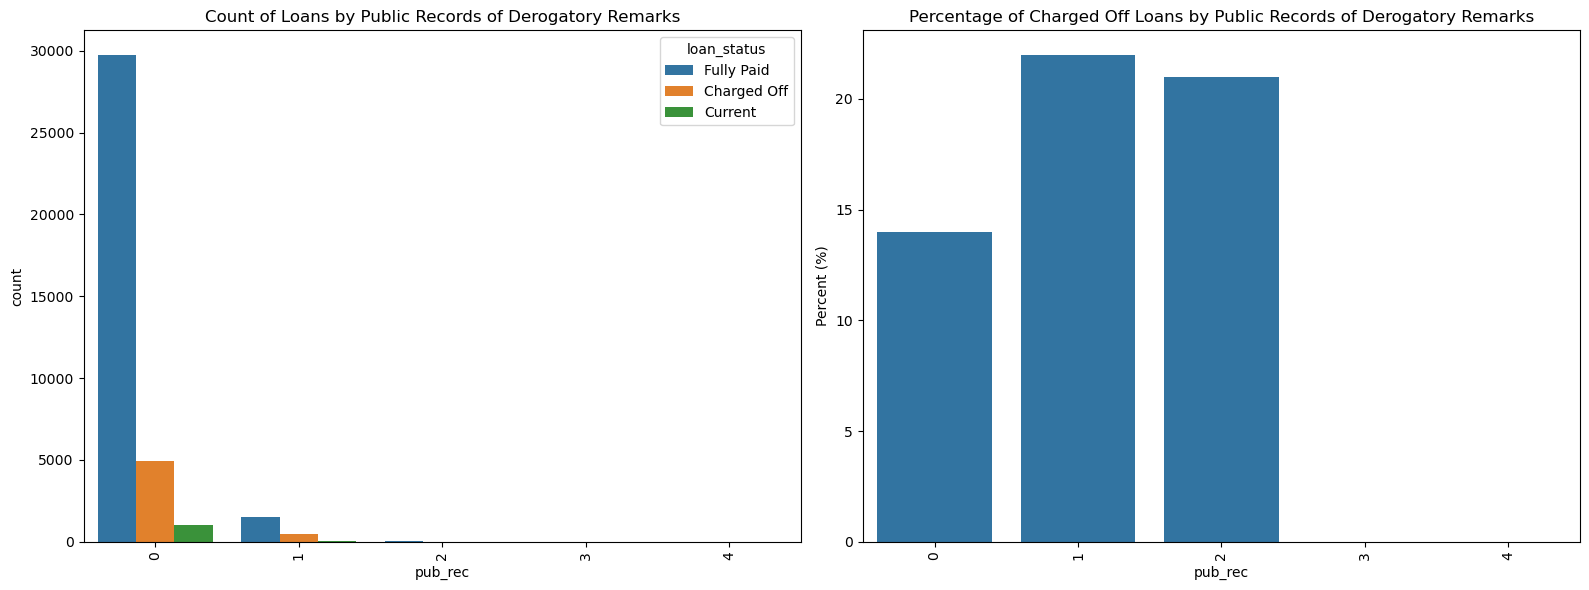

In [240]:
# Set default figure size and layout
plt.rcParams["figure.figsize"] = [16.00, 6]
plt.rcParams["figure.autolayout"] = True

# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)

# Rotate x-tick labels for better visibility
for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(90)

sns.countplot(x='pub_rec', hue='loan_status', data=loandf, ax=ax[0])
ax[0].set_title('Count of Loans by Public Records of Derogatory Remarks')


pub_rec_values = loandf.pub_rec.value_counts().index
charged_off_percentages=[round((len(loandf[(loandf.pub_rec ==values) & (loandf.loan_status=="Charged Off")]))/
    len(loandf[(loandf.pub_rec==values)]),2)*100 for values in pub_rec_values]

ax[1].set_title('Percentage of Charged Off Loans by Public Records of Derogatory Remarks')
ax[1].set_ylabel('Percent (%)')
sns.barplot(x=pub_rec_values,y=charged_off_percentages,ax=ax[1])

plt.xticks(rotation=90)
plt.show()

In [241]:
# we se those who have some derogatory records have more chances to default but since data is less so we can ignore
# this factor 

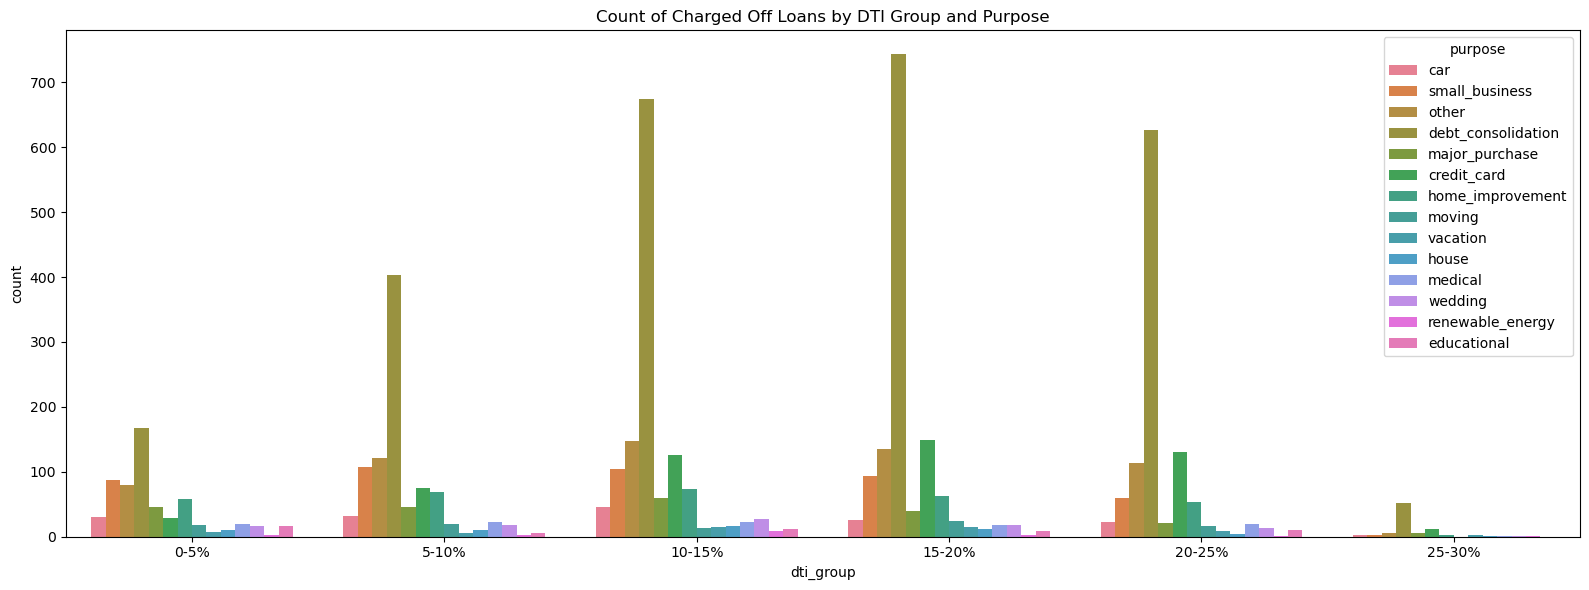

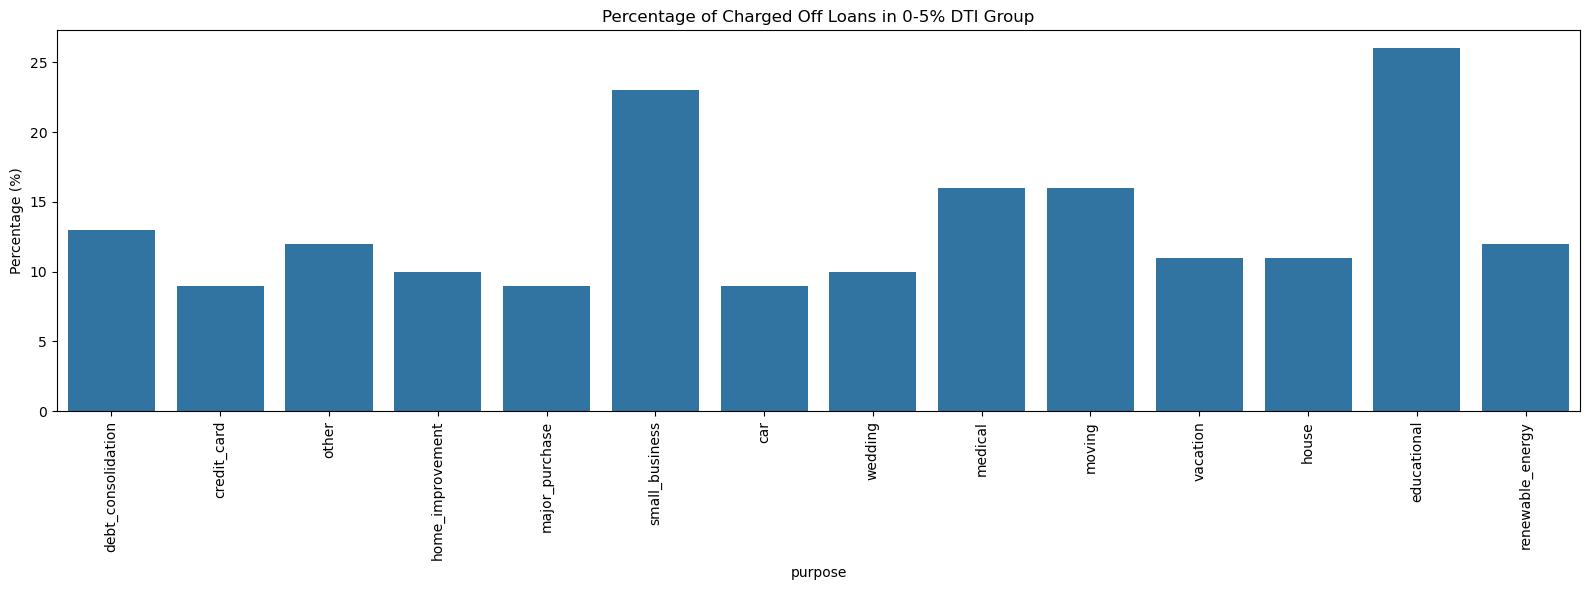

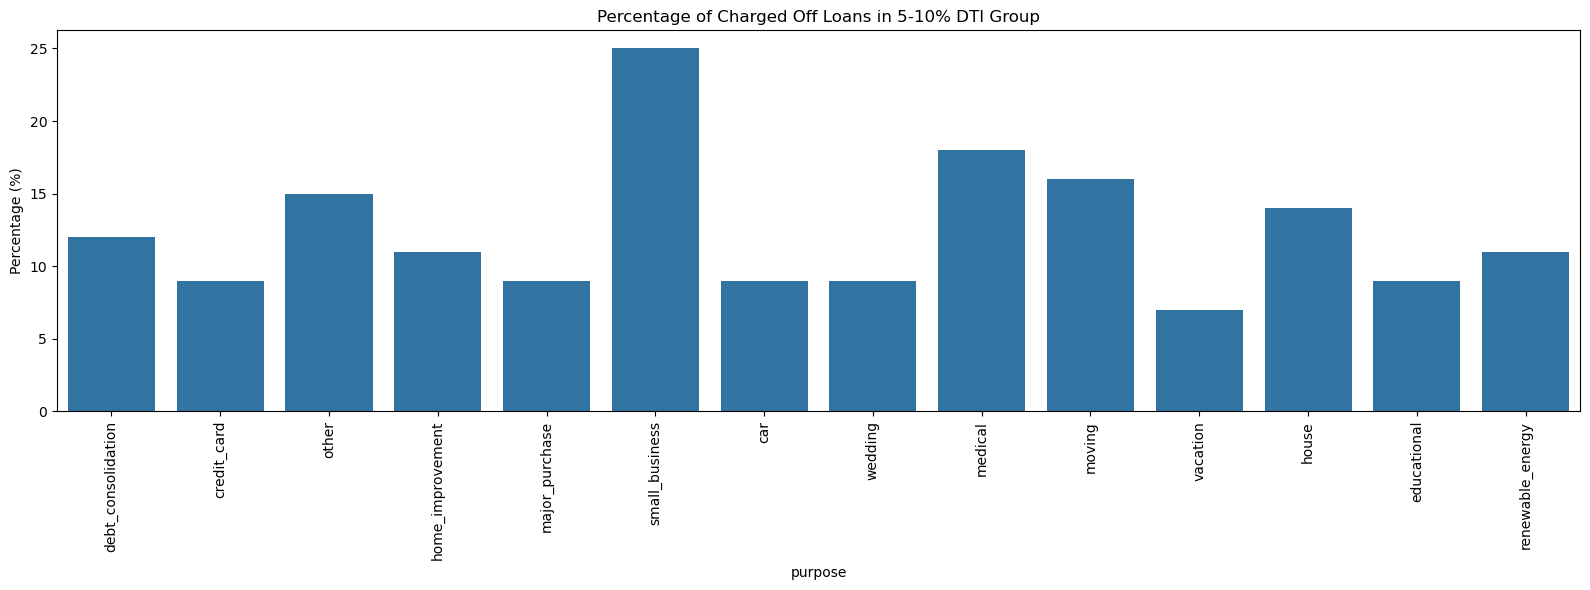

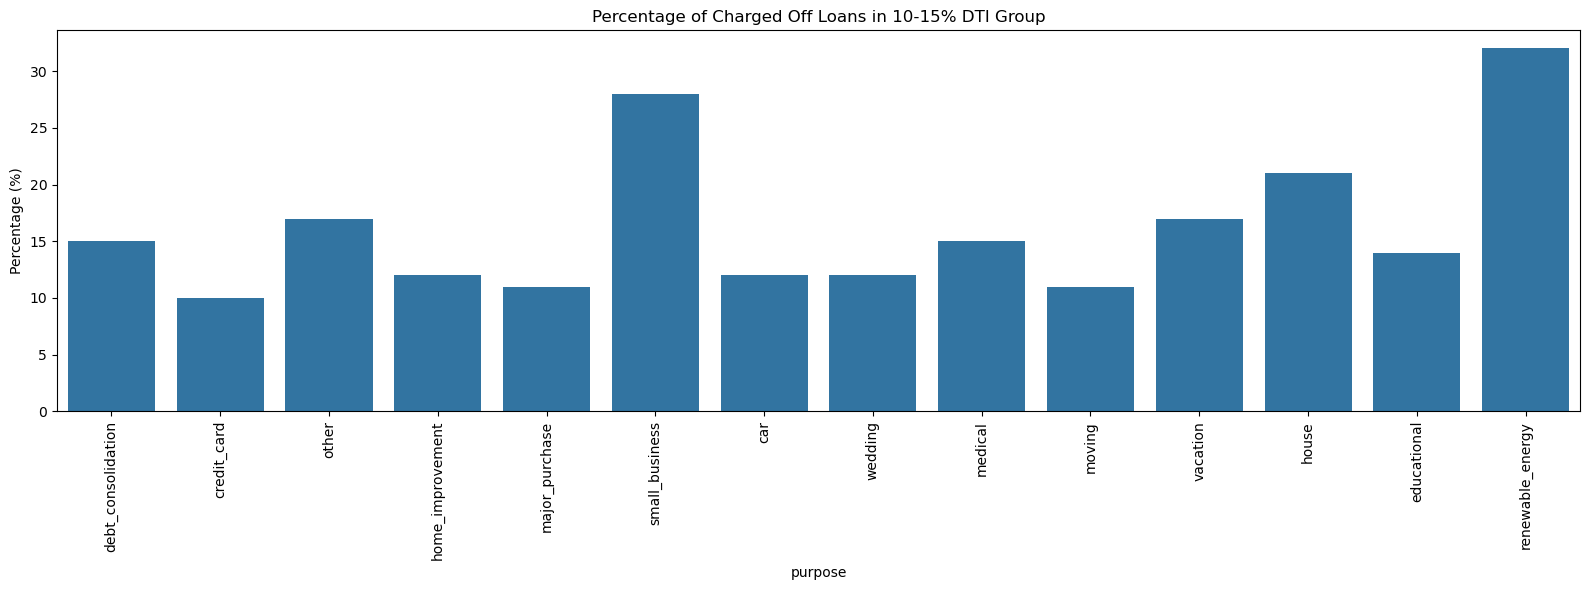

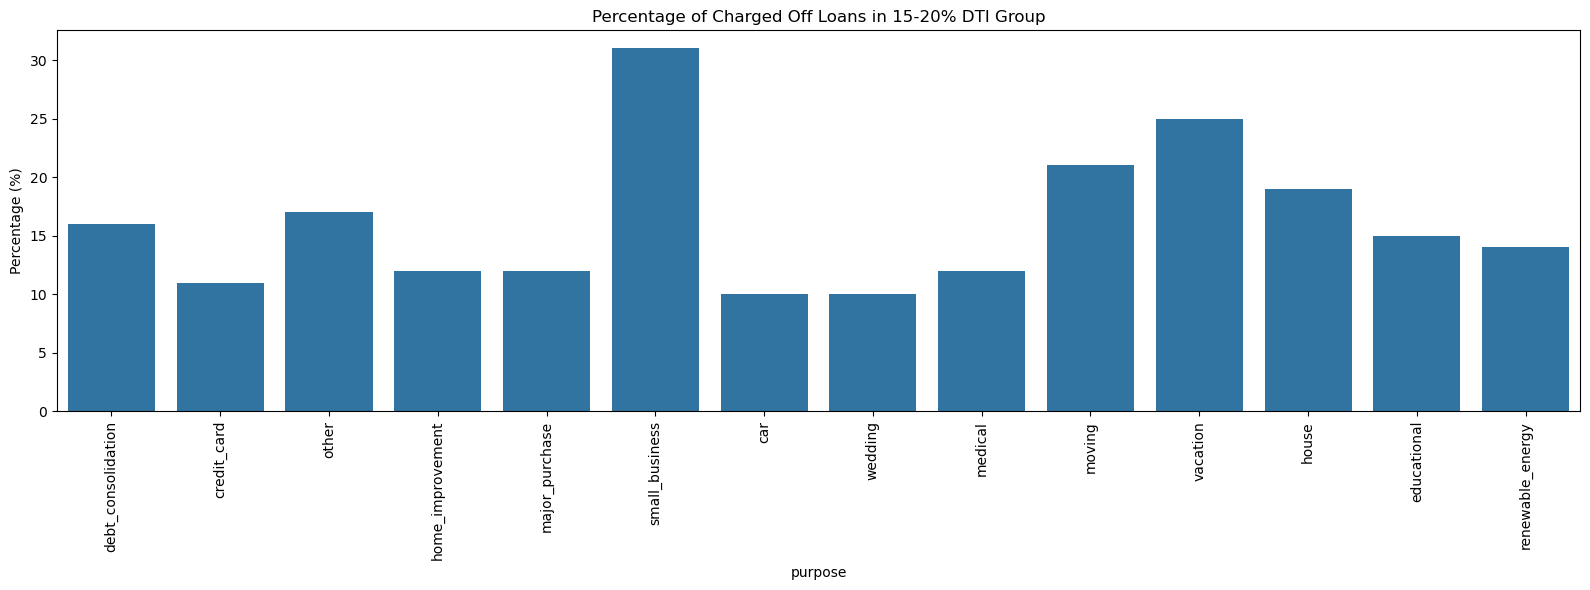

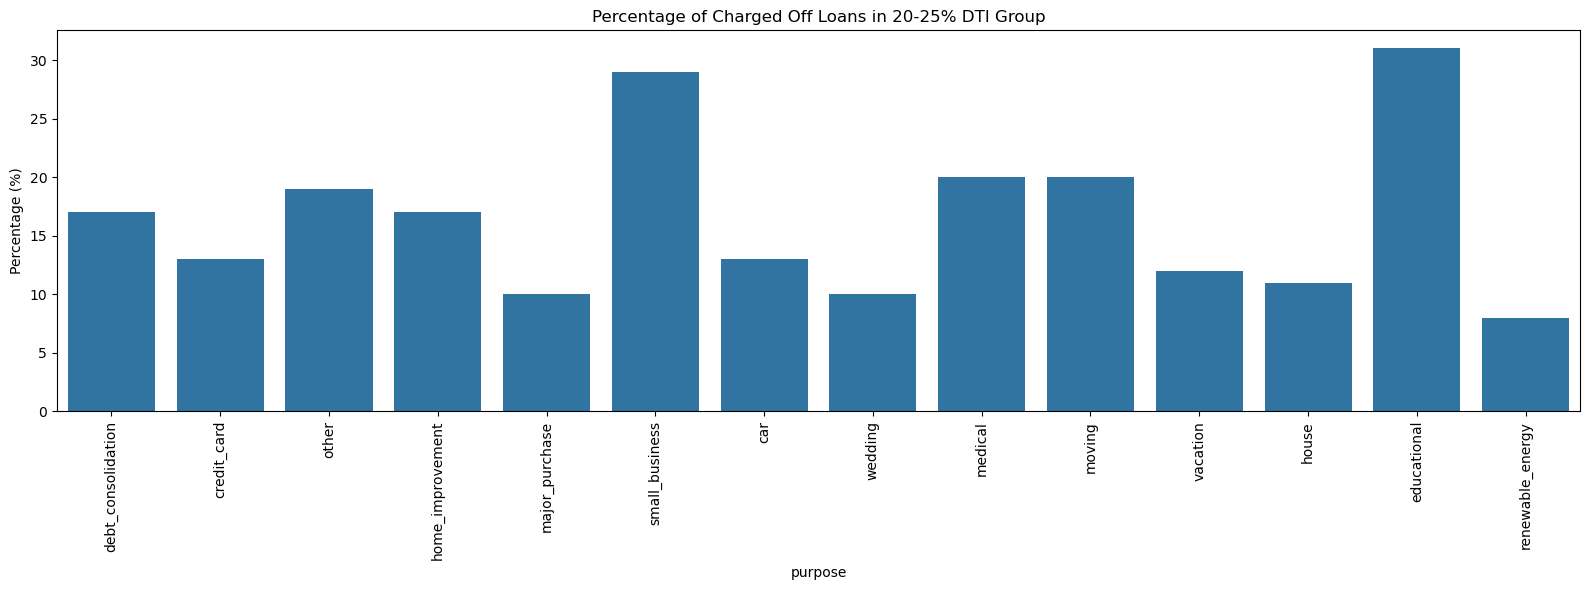

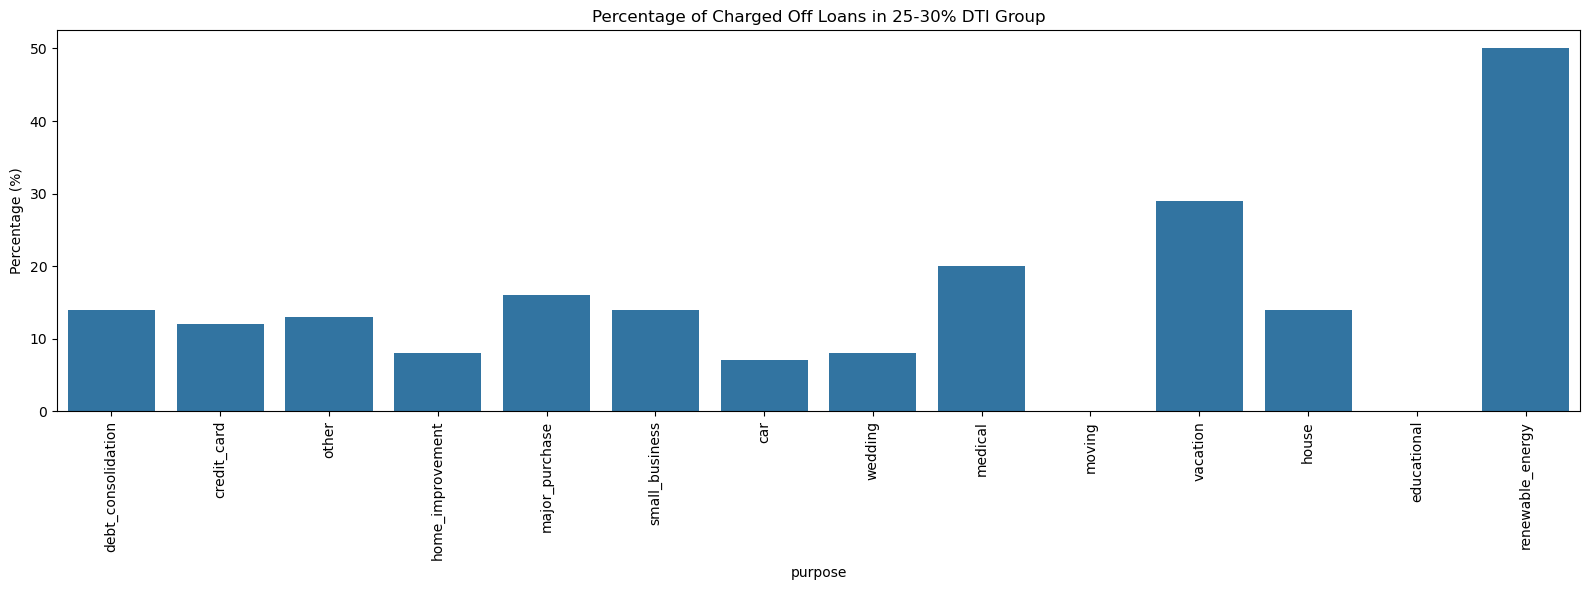

In [242]:
# Filter for charged-off loans
charged_off_loans = loandf[loandf.loan_status == "Charged Off"]

# Count plot for DTI group with hue for purpose
sns.countplot(x='dti_group', hue='purpose', 
              order=["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "25-30%"],
              data=charged_off_loans)
plt.title('Count of Charged Off Loans by DTI Group and Purpose')
plt.show()


# Define order for DTI groups and purposes
dti_order = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "25-30%"]
purpose_order = loandf.purpose.value_counts().index

for dti in dti_order:
    pp=charged_off_loans[(charged_off_loans.dti_group == dti)]
    per=[round(len(pp[(pp.purpose == purpose)])/len(loandf[(loandf.dti_group == dti)& (loandf.purpose == purpose)]),2)*100 for purpose in purpose_order]
    plt.title(f'Percentage of Charged Off Loans in {dti} DTI Group')
    plt.ylabel('Percentage (%)')
    sns.barplot(x=purpose_order,y=per)
    plt.xticks(rotation=90)
    plt.show()

      


In [243]:
# Small business loan are more likly to default if borrowers dti is between 0-25%
# educational loan are more likly to get default if borrowere dti is between 0-5% or between 20-25%
# renewable energy loan are more likly to get default if borrowere dti is between 10-15% or between 25-30%

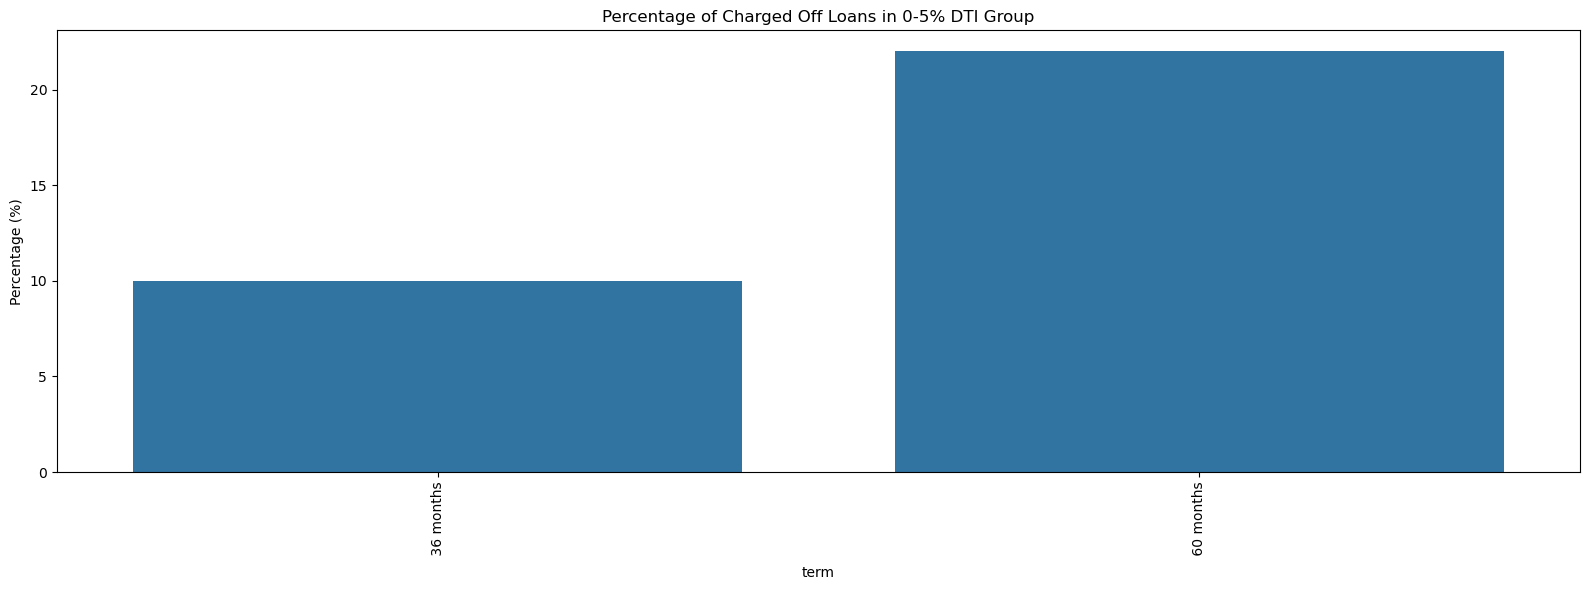

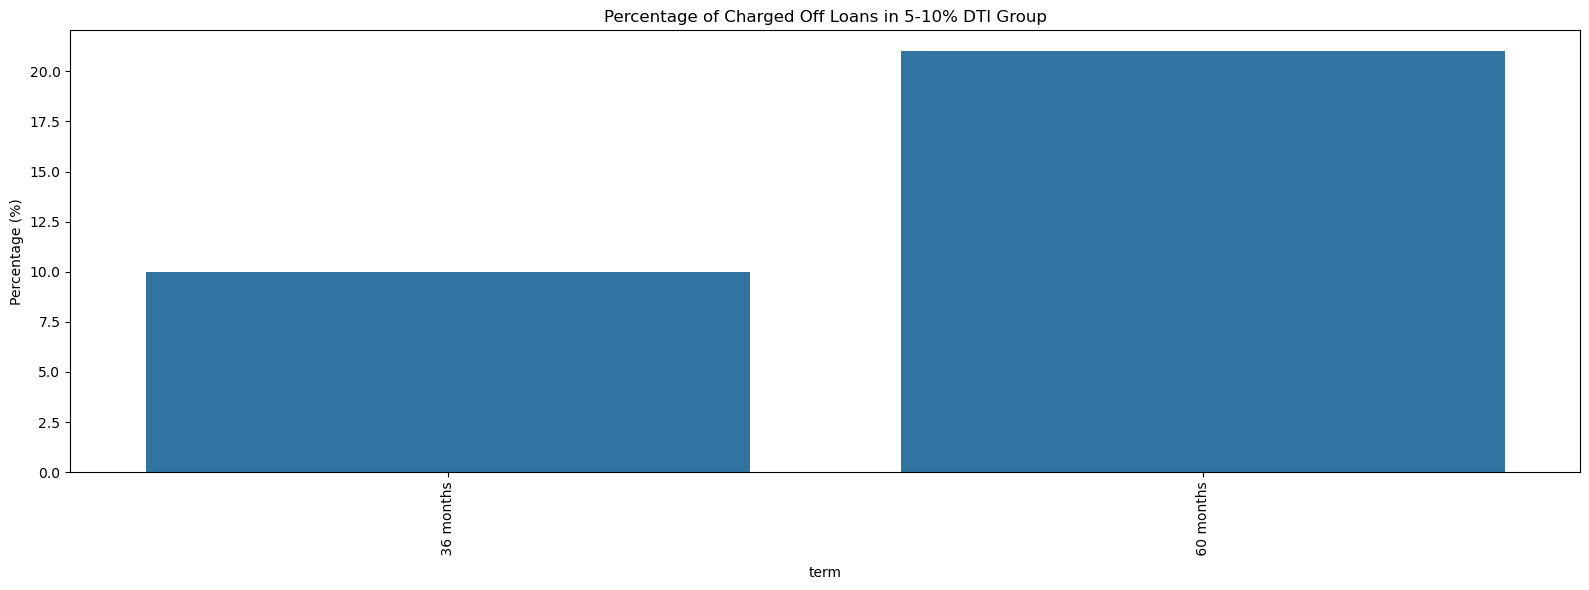

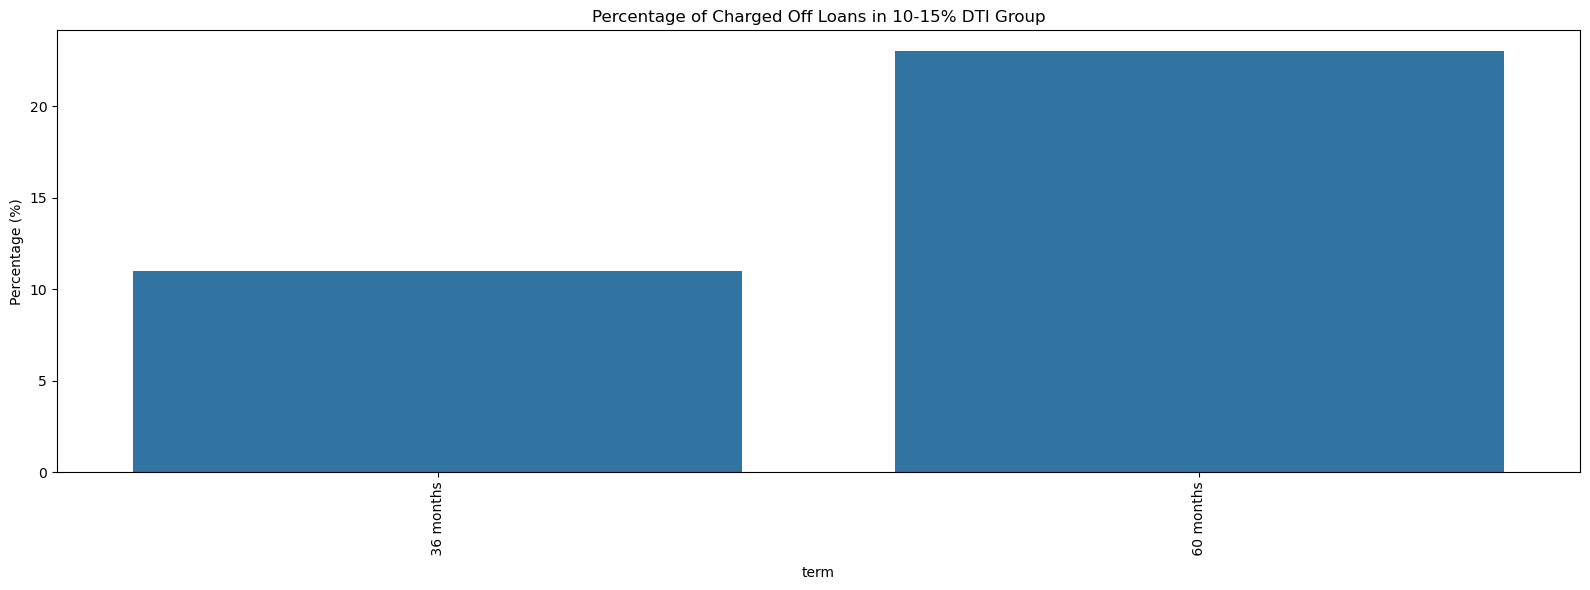

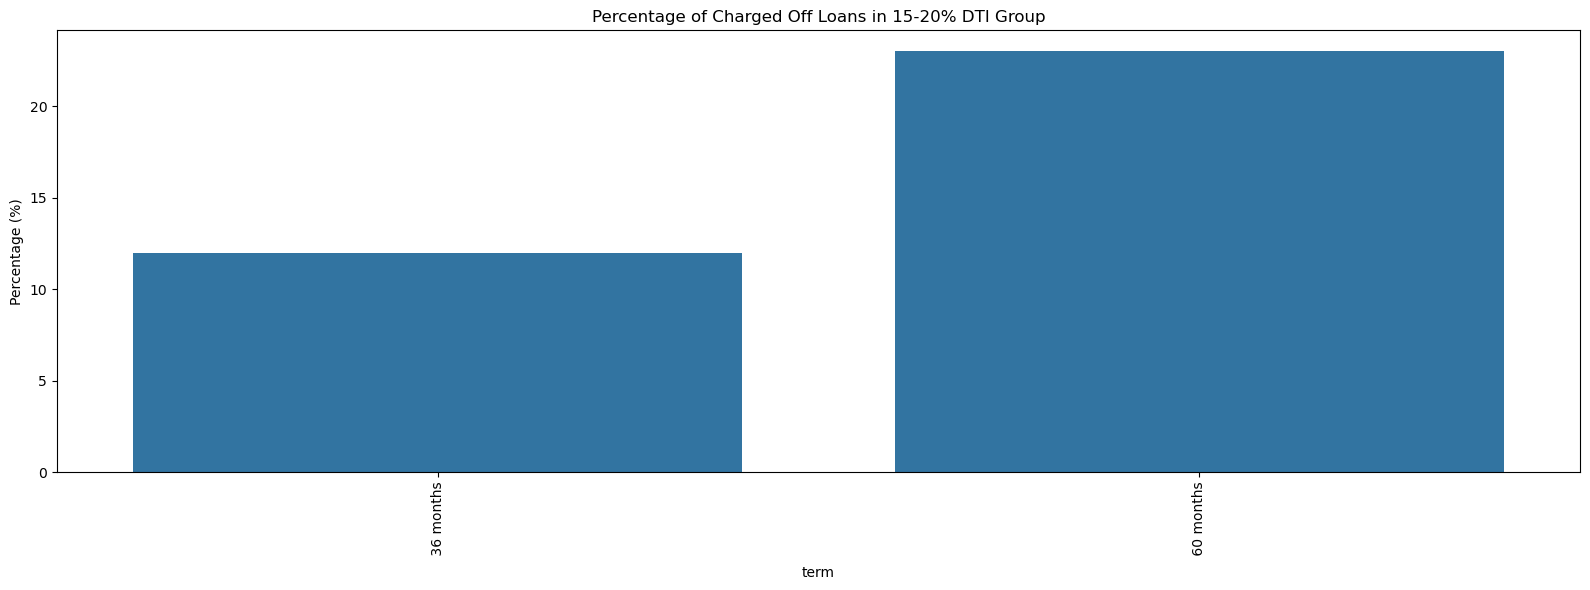

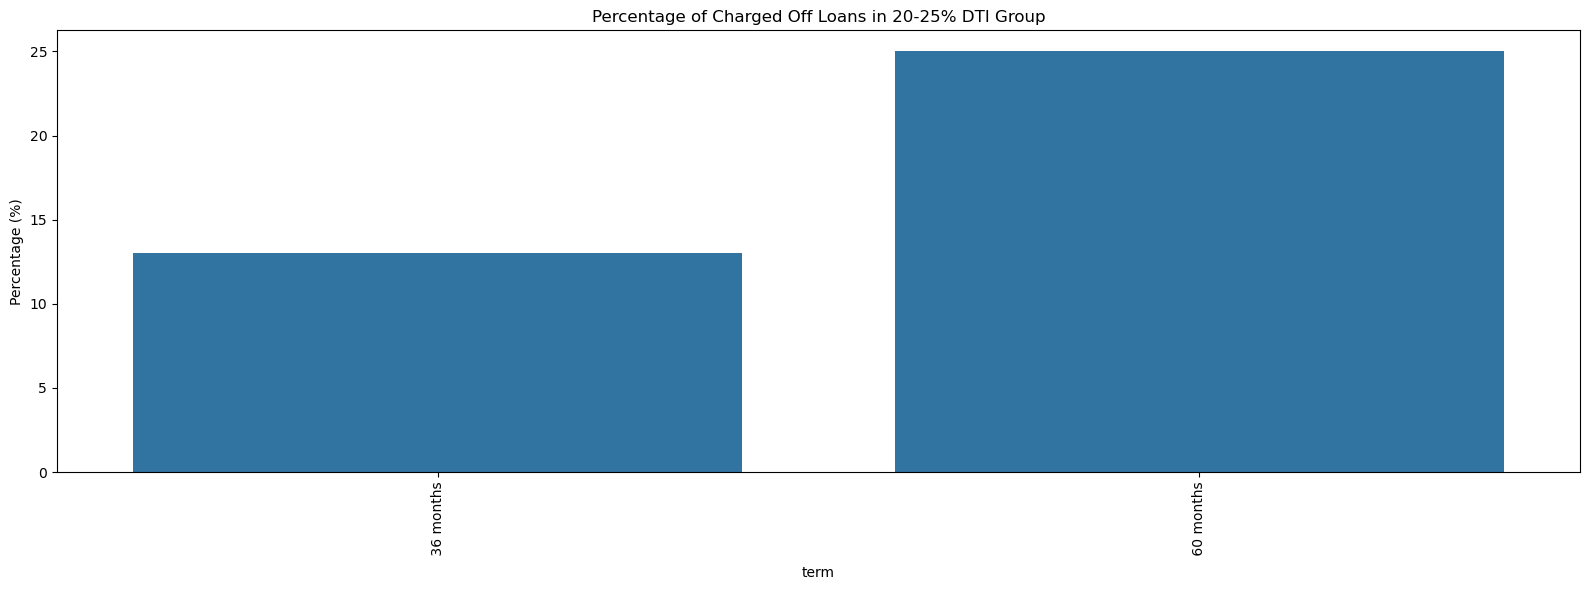

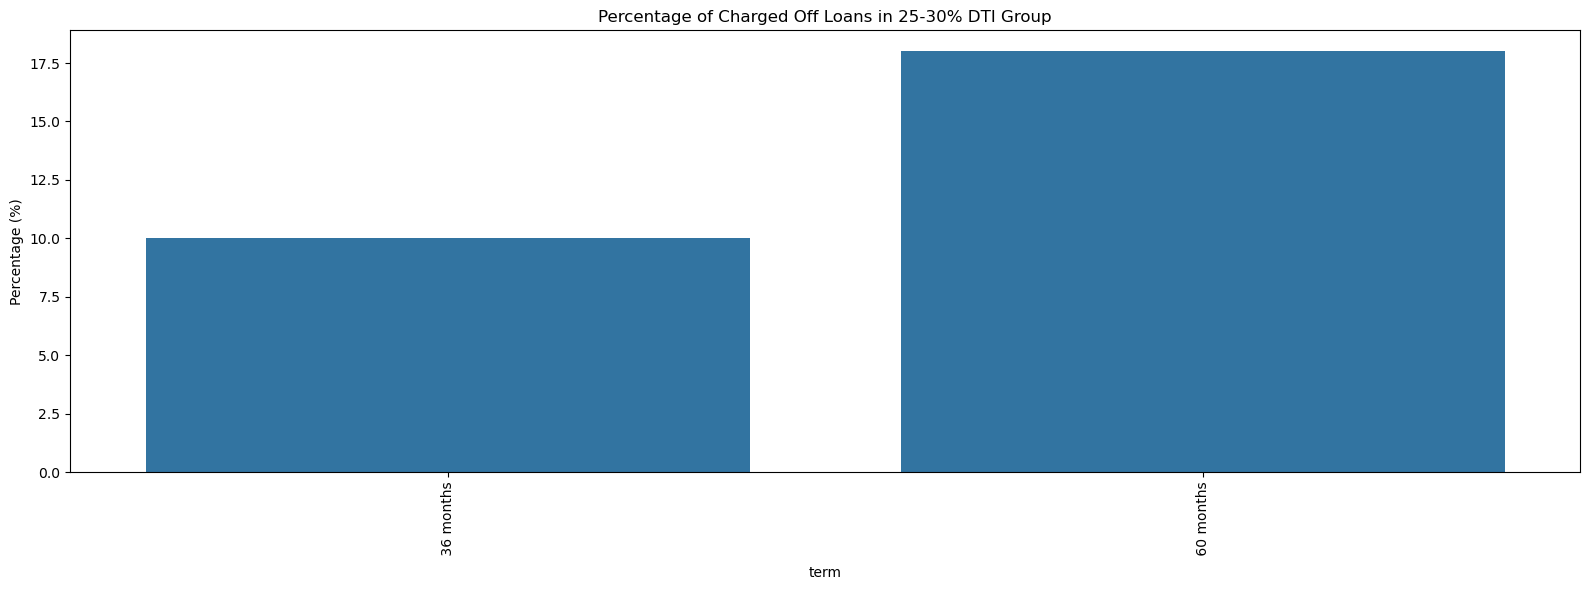

In [244]:
# Filter for charged-off loans
charged_off_loans = loandf[loandf.loan_status == "Charged Off"]

# Define DTI groups and terms
dti_order = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "25-30%"]
term_order = loandf.term.value_counts().index

for dti in dti_order:
    pp=charged_off_loans[(charged_off_loans.dti_group == dti)]
    per=[round(len(pp[(pp.term == term)])/len(loandf[(loandf.dti_group == dti)& (loandf.term == term)]),2)*100 for term in term_order]
    sns.barplot(x=term_order,y=per)
    plt.title(f'Percentage of Charged Off Loans in {dti} DTI Group')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=90)
    plt.show()

In [245]:

# 60 month loans are more likly to  default irrespective of what dti ratio borrower has 

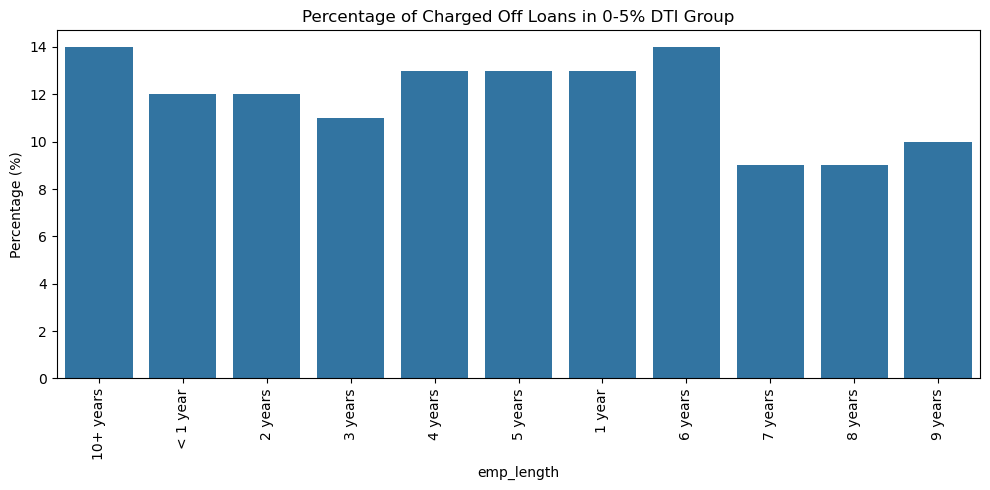

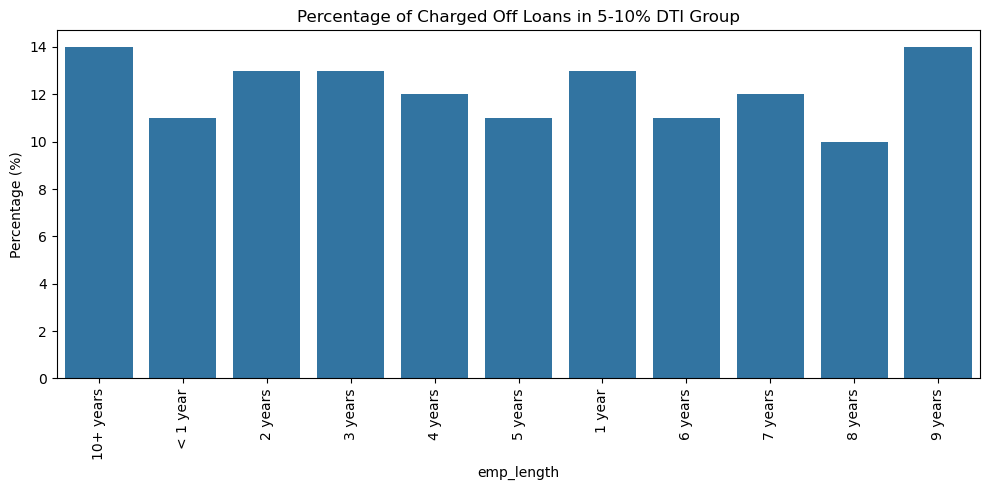

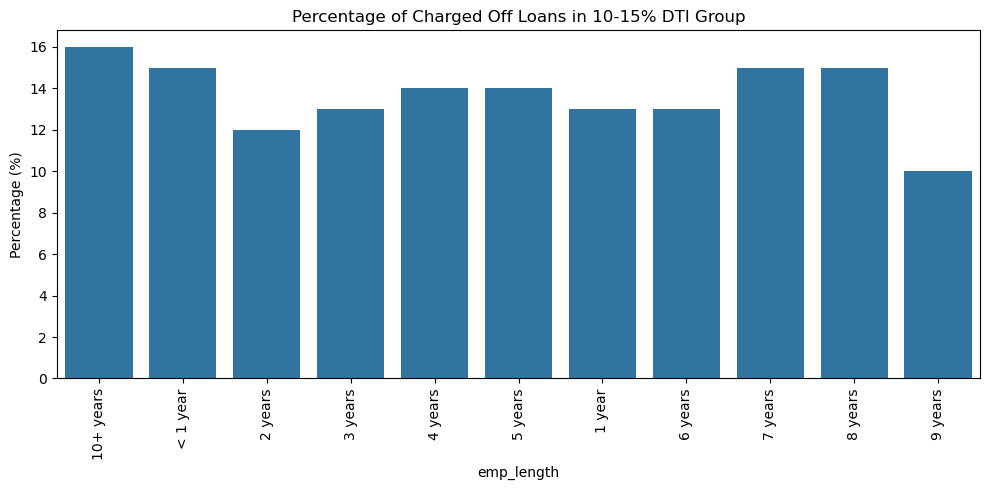

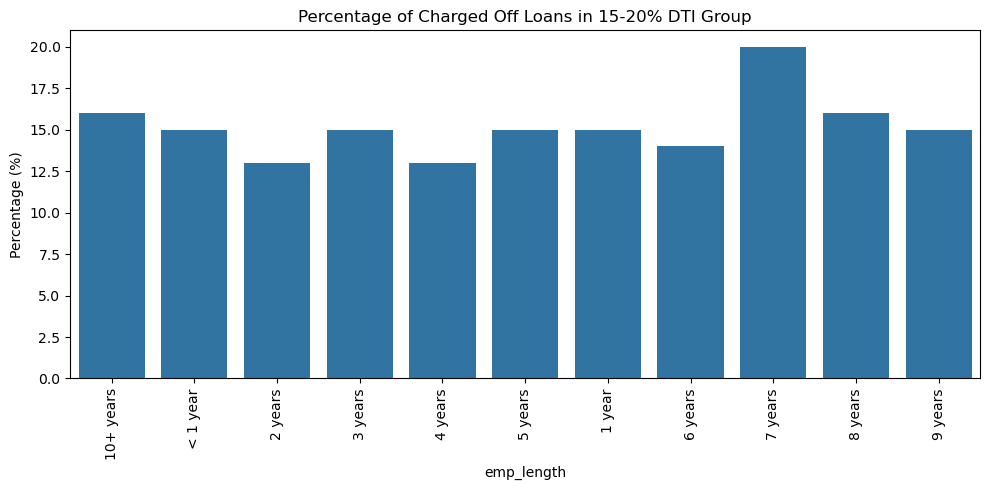

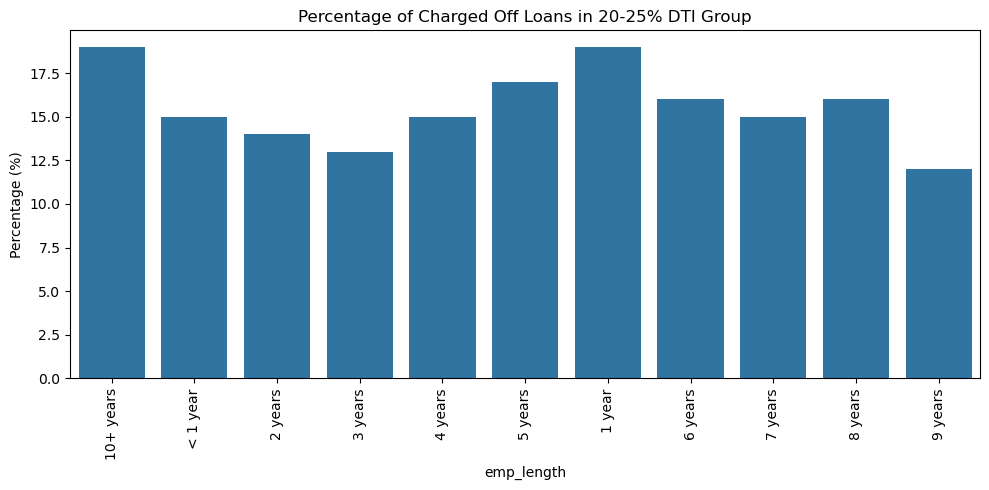

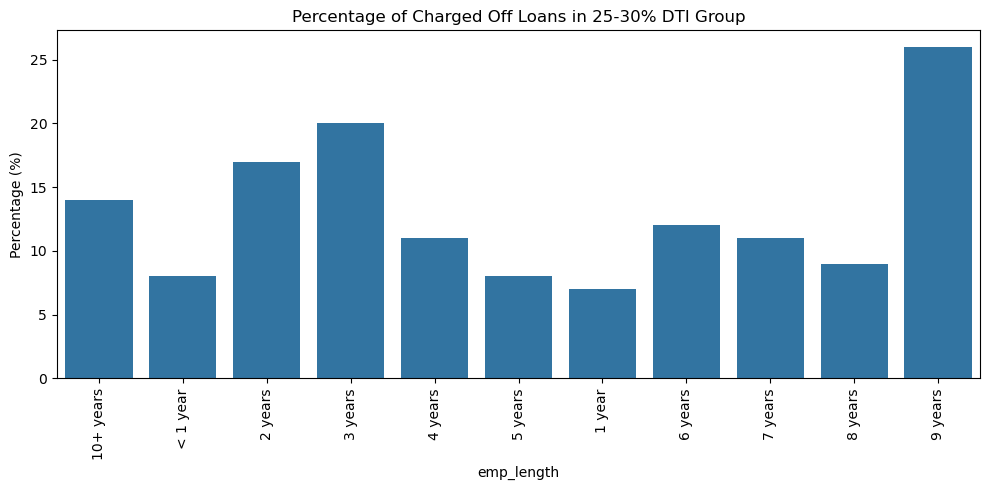

In [246]:
# Filter for charged-off loans
charged_off_loans = loandf[loandf.loan_status == "Charged Off"]

# Define DTI groups and employment length order
dti_order = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "25-30%"]
emp_length_order = loandf.emp_length.value_counts().index

for dti in dti_order:
    pp=charged_off_loans[(charged_off_loans.dti_group == dti)]
    per=[round(len(pp[(pp.emp_length == length)])/len(loandf[(loandf.dti_group == dti)& (loandf.emp_length == length)]),2)*100 for length in emp_length_order]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=emp_length_order, y=per)
    plt.title(f'Percentage of Charged Off Loans in {dti} DTI Group')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=90)
    plt.show()

In [247]:
# we see no clear pattern for defaulters if we combine dti with no of year of experience.

In [248]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37777 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37777 non-null  int64  
 1   funded_amnt           37777 non-null  int64  
 2   funded_amnt_inv       37777 non-null  float64
 3   term                  37777 non-null  object 
 4   int_rate              37777 non-null  float64
 5   grade                 37777 non-null  object 
 6   sub_grade             37777 non-null  object 
 7   emp_length            37777 non-null  object 
 8   home_ownership        37777 non-null  object 
 9   annual_inc            37777 non-null  float64
 10  verification_status   37777 non-null  object 
 11  issue_d               37777 non-null  object 
 12  loan_status           37777 non-null  object 
 13  purpose               37777 non-null  object 
 14  addr_state            37777 non-null  object 
 15  dti                   37

In [249]:
loandf.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'pub_rec', 'revol_bal',
       'revol_util', 'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'dti_group', 'intrest_rate_group', 'revol_util_group'],
      dtype='object')

In [250]:
heatmap_columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
    'int_rate', 'annual_inc', 'dti', 'revol_bal', 
    'revol_util', 'issue_year'
]


In [251]:
# Calculate the correlation matrix
correlation_matrix = loandf[heatmap_columns].corr()

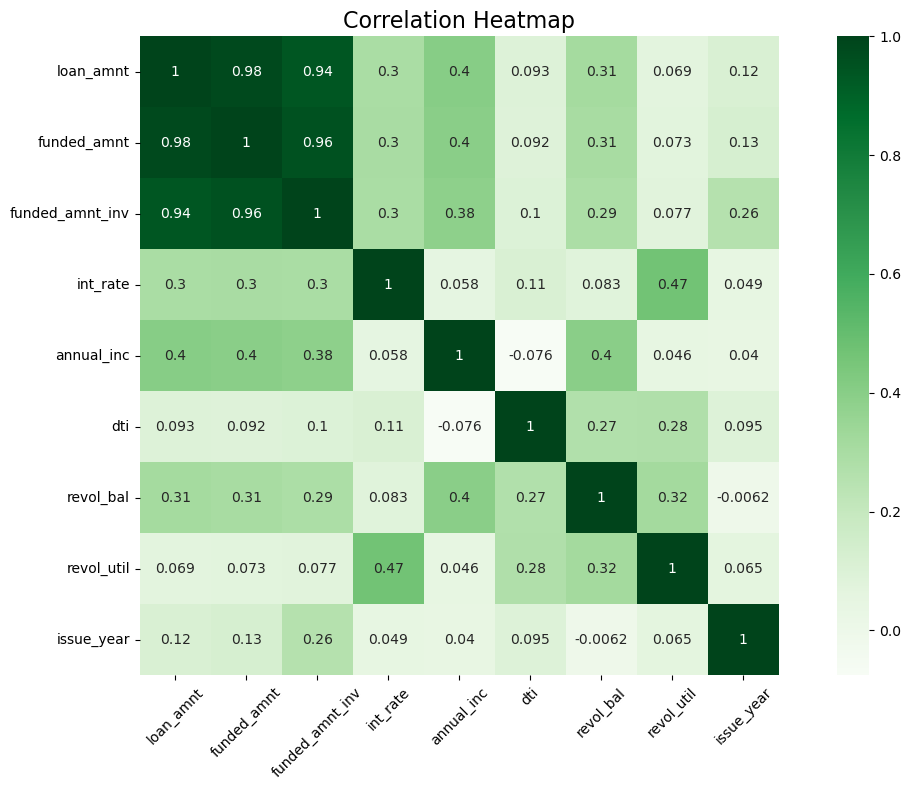

In [252]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="Greens", 
    square=True
    
)

# Title for the heatmap
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)    # Keep y-axis labels horizontal
plt.show()

In [253]:
# loan amount has high positive corelation with funded amount and investor funded amount